In [58]:
#Import necessary libraries

#for data analysis
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#data for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")


Defaulting to user installation because normal site-packages is not writeable


In [59]:
#Load dataset
df = pd.read_csv(r"C:\Users\adewu\Downloads\10NALYTICS\ASSIGNMENT\Capstone\diabetes_prediction_dataset.csv")

## Data Understanding

In [60]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [61]:
#Data verification - data type, number of features and rows, missing data etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [62]:
#statistical analysis of data
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


- the analysis of the:
- age shows, mean ~ median apprx normal dist., and the difference btw the median and mean is apprx less than 5% of the mean. There is no extreme outliers.
- hypertension shows, mean ~ median apprx normal dist., no extreme outliers 
- heart_disease shows, mean ~ median apprx normal dist., no extreme outliers 
- bmi shows, mean ~ median, normal dist., no  outliers 
- HbA1c_level shows, mean < median, mildly skewed, possible extreme outliers 
- blood_glucose_level shows, mean < median apprx normal dist., no extreme outliers 
- diabetes shows, mean ~ median apprx normal dist., no extreme outliers 

## Data Cleaning

In [63]:
#Convert the data type of age to integer
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 6.5+ MB


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


<AxesSubplot:>

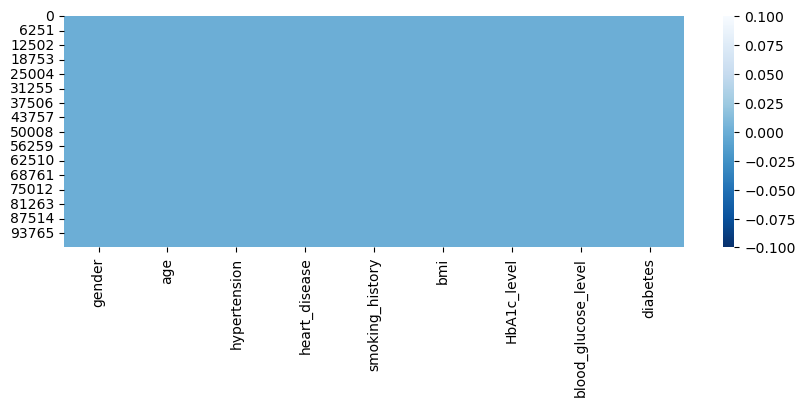

In [64]:
#checking for missing values
print(df.isnull().sum())

#visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

- no missing data in the columns

In [65]:
#Check for duplicate data
df.duplicated().sum()

3888

In [66]:
#view the duplicated data
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80,0,0,No Info,27.32,6.6,159,0
3272,Female,80,0,0,No Info,27.32,3.5,80,0
3418,Female,19,0,0,No Info,27.32,6.5,100,0
3939,Female,78,1,0,former,27.32,3.5,130,0
3960,Male,47,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52,0,0,never,27.32,6.1,145,0
99985,Male,25,0,0,No Info,27.32,5.8,145,0
99989,Female,26,0,0,No Info,27.32,5.0,158,0
99990,Male,39,0,0,No Info,27.32,6.1,100,0


In [67]:
#drop duplicate data
df.drop_duplicates(inplace=True)

In [68]:
#confirm to see if duolicates are dropped.
df.duplicated().sum()

0

In [69]:
#Check for irrelevant columns
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0


In [70]:
#put all numerical column into a dataframe
numerical_data = df.select_dtypes(include="number")
numerical_data.head(2)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,54,0,0,27.32,6.6,80,0


In [71]:
numerical_columns = numerical_data.columns
numerical_columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [72]:
categorical_data = df.select_dtypes(include="object")
categorical_columns = categorical_data.columns
categorical_columns

Index(['gender', 'smoking_history'], dtype='object')

# Exploratory Data Analysis

### Univariate Analysis

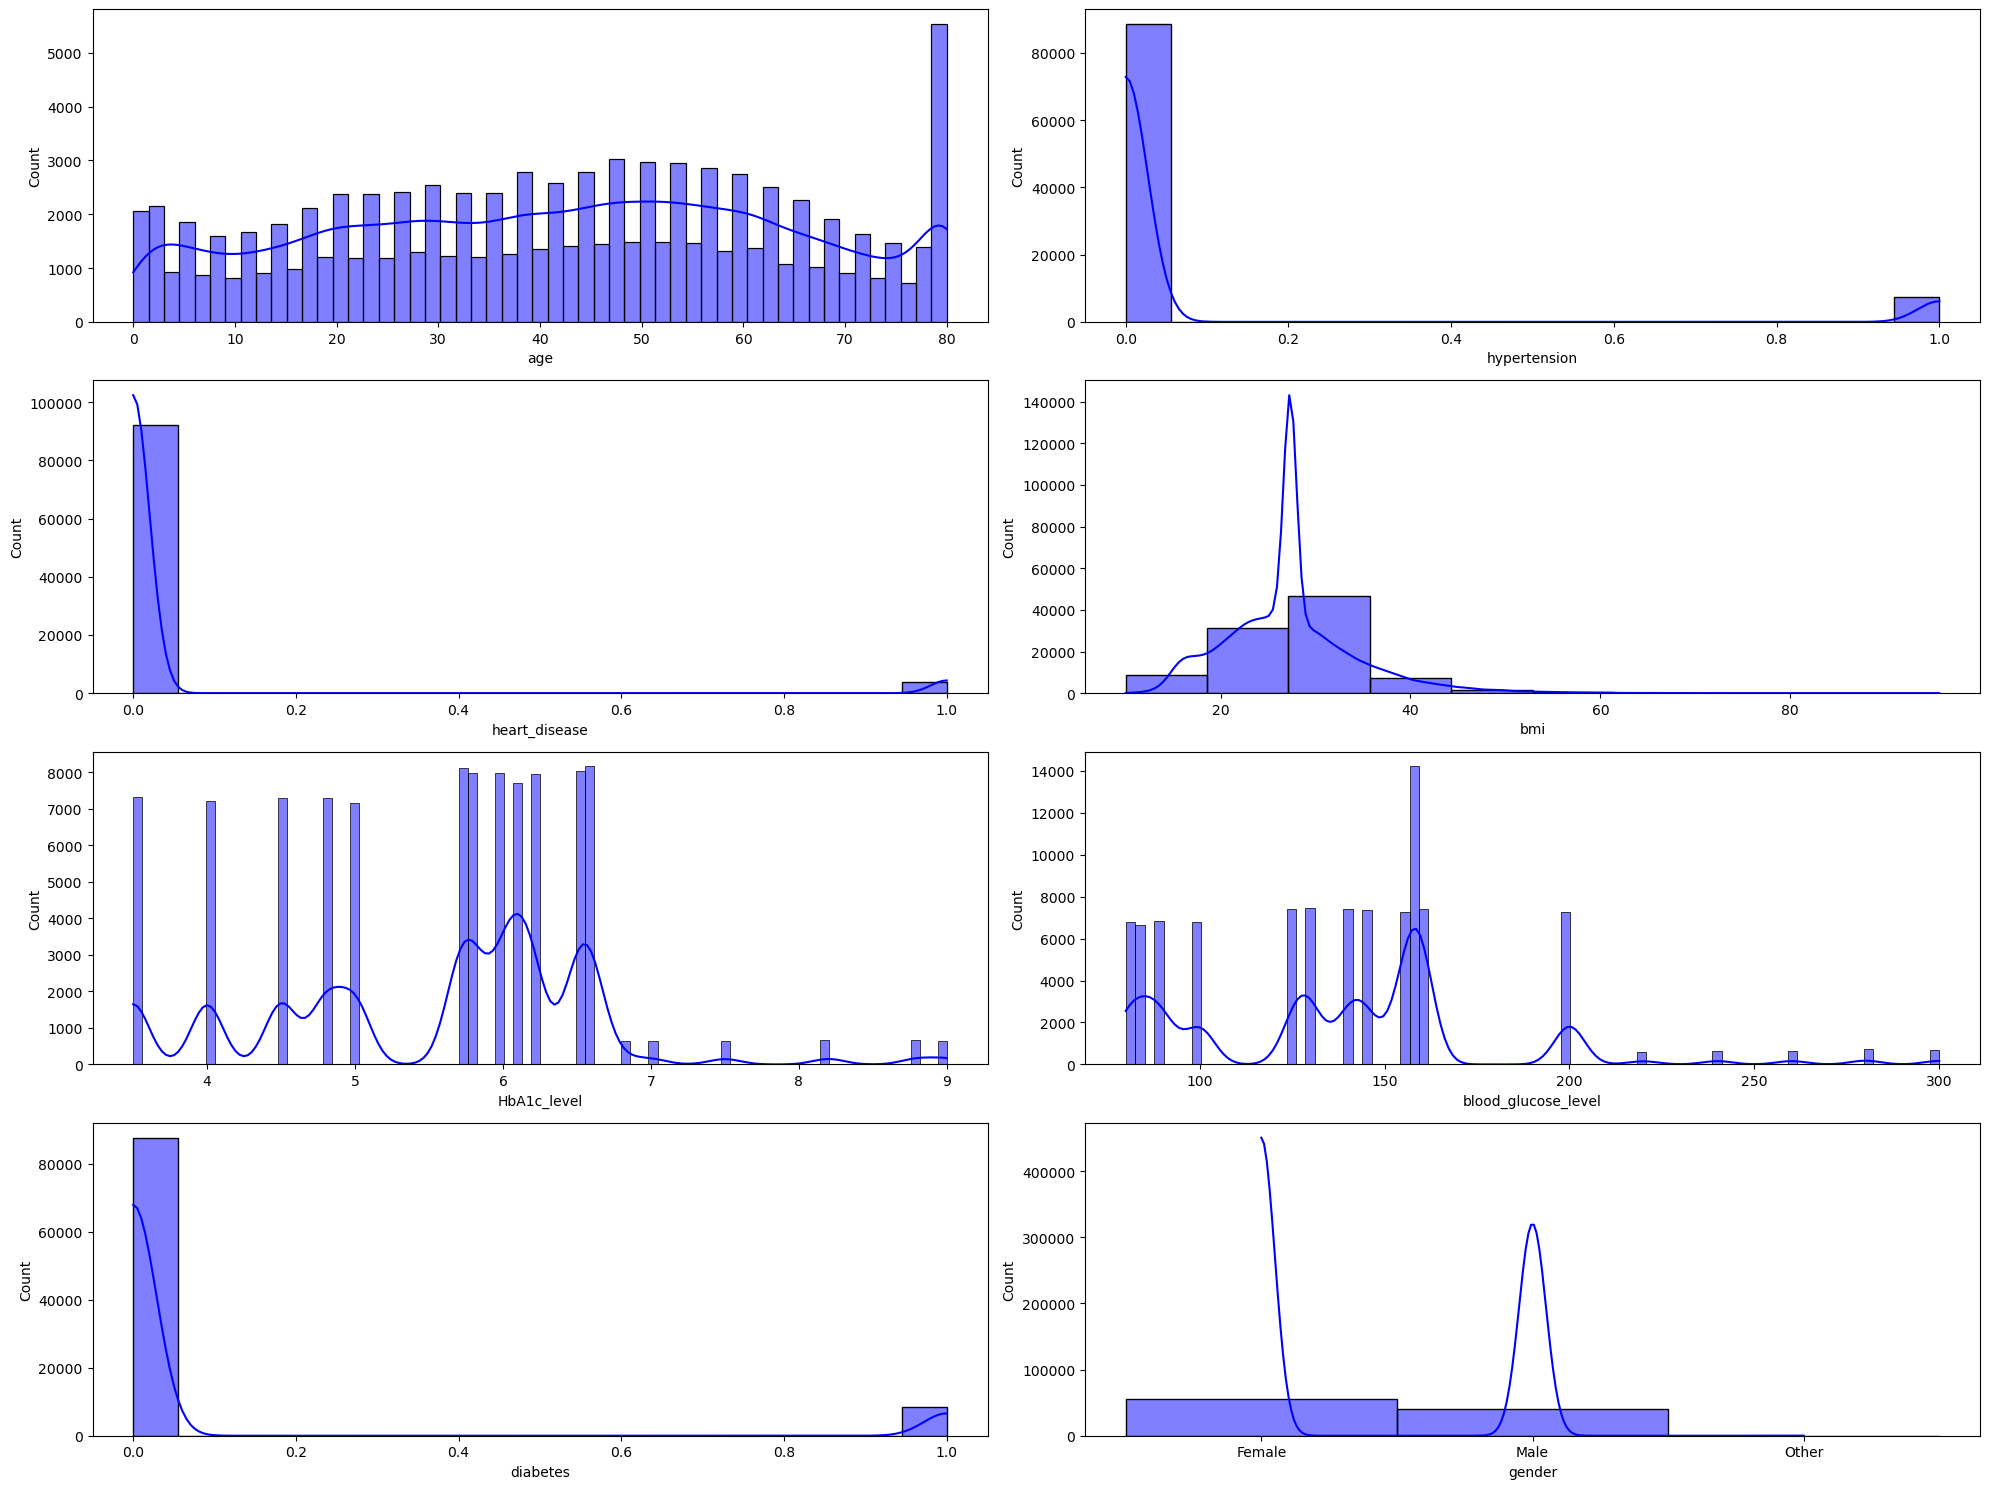

In [73]:
#subplots to show a visuaization of all columns  
fig, position = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
sns.histplot(df["age"], color="blue", kde=True, ax=position[0,0])
sns.histplot(df["hypertension"], color="blue", kde=True, ax=position[0,1])
sns.histplot(df["heart_disease"], color="blue", kde=True, ax=position[1,0])
sns.histplot(df["bmi"], color="blue", bins=10, kde=True, ax=position[1,1])
sns.histplot(df["HbA1c_level"], color="blue", kde=True, ax=position[2,0])
sns.histplot(df["blood_glucose_level"], color="blue", kde=True, ax=position[2,1])
sns.histplot(df["diabetes"], color="blue", kde=True, ax=position[3,0])
sns.histplot(df["gender"], color="blue", kde=True, ax=position[3,1])

plt.tight_layout()
plt.show()

- the histogram shows the highest age is around 80 years.
- less than 20000 people have hypertension, more than 80000 doesnt have hypertension. The distribution of hypertension is a right skewed distribution. 
-  The distribution of heart_disease is a right skewed distribution. More people do not have heart disease. Minority of the people have heart disease.
- 'bmi' has a normal distribution. 
- the target variable 'diabetes' has a right skewed distribution. More people do not have diebetes.
- the female gender is more the male

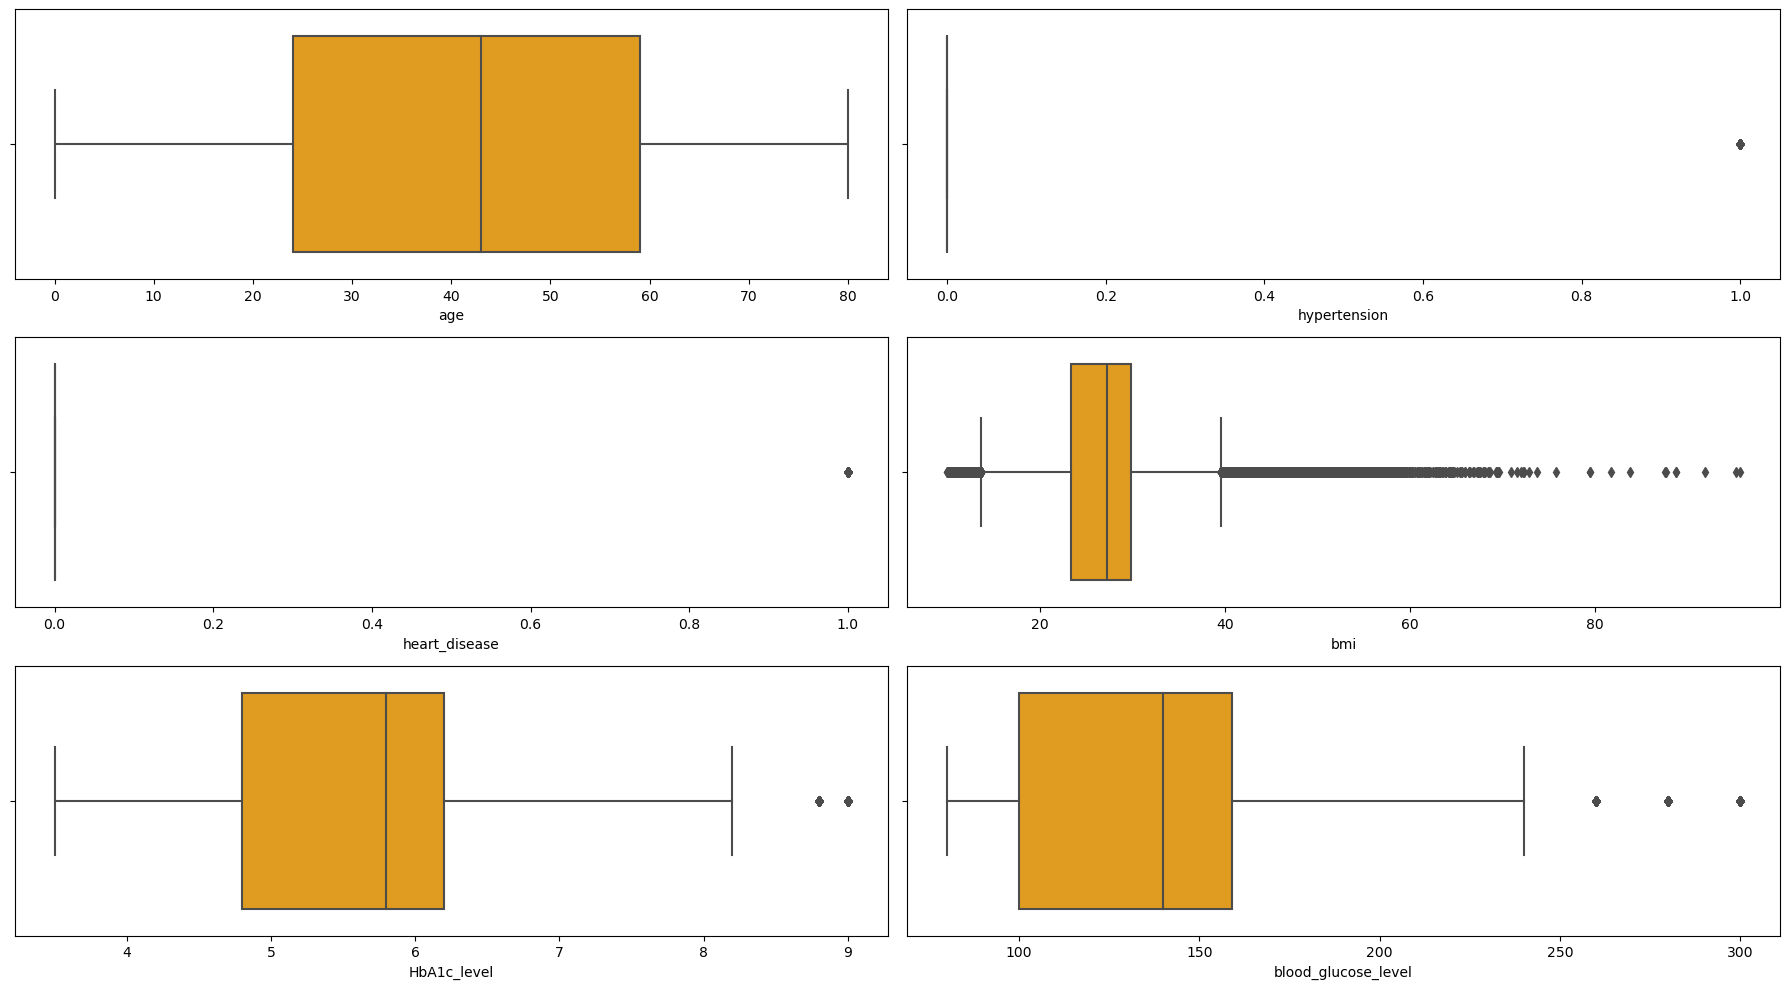

In [74]:
#Handling Outliers
#boxplots to visualize the data in columns and outliers 
fig, position = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
sns.boxplot(x =df["age"], color="orange", ax=position[0,0])
sns.boxplot(x =df["hypertension"], color="orange", ax=position[0,1])
sns.boxplot(x =df["heart_disease"], color="orange", ax=position[1,0])
sns.boxplot(x =df["bmi"], color="orange", ax=position[1,1])
sns.boxplot(x =df["HbA1c_level"], color="orange", ax=position[2,0])
sns.boxplot(x =df["blood_glucose_level"], color="orange", ax=position[2,1])

plt.tight_layout()
plt.show()

- bmi, HbA1c_lavel, blood_glucose_level have outliers.
- heart_disease and hypertension are categorised (0,1), hence the visualization is blank.
- I dont hink it is advisable to remove the outliers because it is a real data and doesnt seem as an error

In [75]:
df.shape

(96112, 9)

In [76]:
#Feature engineering
#hypertension label
def hyper_cat(hyp):
    if hyp == 1:
        return "Yes"
    else:
        return "No"

df['hypertension_cat'] = df['hypertension'].apply(hyper_cat)

In [77]:
#feature engineering
#heart_disease label
def label1(hd):
    if hd == 1:
        return "Yes"
    else:
        return "No"

df['hd_label'] = df['heart_disease'].apply(label1)

#Target-diabetes label
def label2(dia):
    if dia == 1:
        return "Yes"
    else:
        return "No"

df['diab_label'] = df['diabetes'].apply(label2)

Text(0.5, 1.0, 'Total Number of Patients')

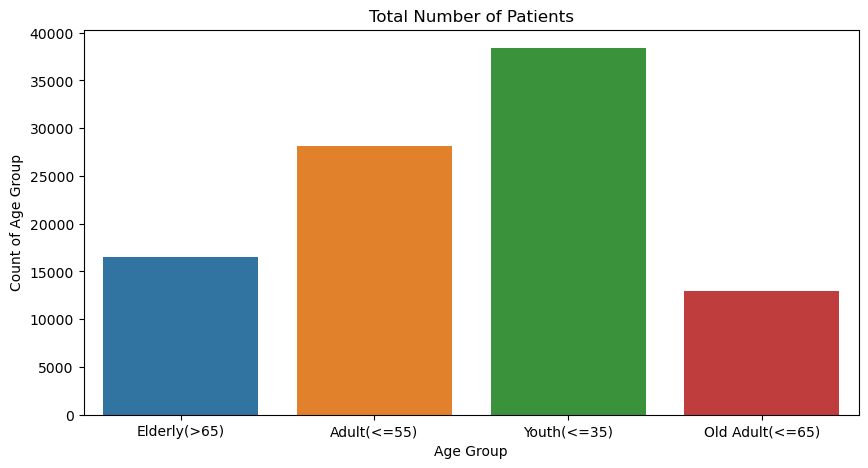

In [78]:
#Data Visualization
#Age Bracket
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

df['age_bracket'] = df['age'].apply(age_bracket)

#Investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

- there is more youth than adult, old adult and elderly in this distribution

In [79]:
#Hemoglobin - blood sugar level
def h_level(HbA1c_level):
    if HbA1c_level < 5.7:
        return "Healthy"
    elif (5.7 <= HbA1c_level < 6.5):
        return "risk"   
    else:
        return "diagnosed"

df['h_level'] = df['HbA1c_level'].apply(h_level)

In [80]:
#blood glucose level
def g_level(blood_glucose_level):
    if blood_glucose_level < 110:
        return "Low"
    elif 110 <= blood_glucose_level < 140:
        return "Medium"
    elif 140 <= blood_glucose_level < 180:
        return "High" 
    else:
        return "Critical"

df['g_level'] = df['blood_glucose_level'].apply(g_level)

In [81]:
#bmi category
def bmi_lvl(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi <= 24.9:
        return "Normal weight"
    elif 25.0 <= bmi <= 29.9:
        return "Overweight"
    else:
        return "Obese"

df['bmi_lvl'] = df['bmi'].apply(bmi_lvl)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96112 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96112 non-null  object 
 1   age                  96112 non-null  int32  
 2   hypertension         96112 non-null  int64  
 3   heart_disease        96112 non-null  int64  
 4   smoking_history      96112 non-null  object 
 5   bmi                  96112 non-null  float64
 6   HbA1c_level          96112 non-null  float64
 7   blood_glucose_level  96112 non-null  int64  
 8   diabetes             96112 non-null  int64  
 9   hypertension_cat     96112 non-null  object 
 10  hd_label             96112 non-null  object 
 11  diab_label           96112 non-null  object 
 12  age_bracket          96112 non-null  object 
 13  h_level              96112 non-null  object 
 14  g_level              96112 non-null  object 
 15  bmi_lvl              96112 non-null 

In [84]:
#smoking hist regroup
def smoking_group(smoking_history):
    if smoking_history == "never":
        return "Never"
    elif smoking_history == "current":
        return "Current"
    elif smoking_history in ["former", "not current", "ever"]:
        return "Former"
    else:
        return "Unknown"
    
df['smoking_group'] = df['smoking_history'].apply(smoking_group)

In [85]:
df_copy = df

In [86]:
df.drop("smoking_history", axis=1, inplace=True)

In [87]:
df.head(1)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension_cat,hd_label,diab_label,age_bracket,h_level,g_level,bmi_lvl,smoking_group
0,Female,80,0,1,25.19,6.6,140,0,No,Yes,No,Elderly(>65),diagnosed,High,Overweight,Never


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96112 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96112 non-null  object 
 1   age                  96112 non-null  int32  
 2   hypertension         96112 non-null  int64  
 3   heart_disease        96112 non-null  int64  
 4   bmi                  96112 non-null  float64
 5   HbA1c_level          96112 non-null  float64
 6   blood_glucose_level  96112 non-null  int64  
 7   diabetes             96112 non-null  int64  
 8   hypertension_cat     96112 non-null  object 
 9   hd_label             96112 non-null  object 
 10  diab_label           96112 non-null  object 
 11  age_bracket          96112 non-null  object 
 12  h_level              96112 non-null  object 
 13  g_level              96112 non-null  object 
 14  bmi_lvl              96112 non-null  object 
 15  smoking_group        96112 non-null 

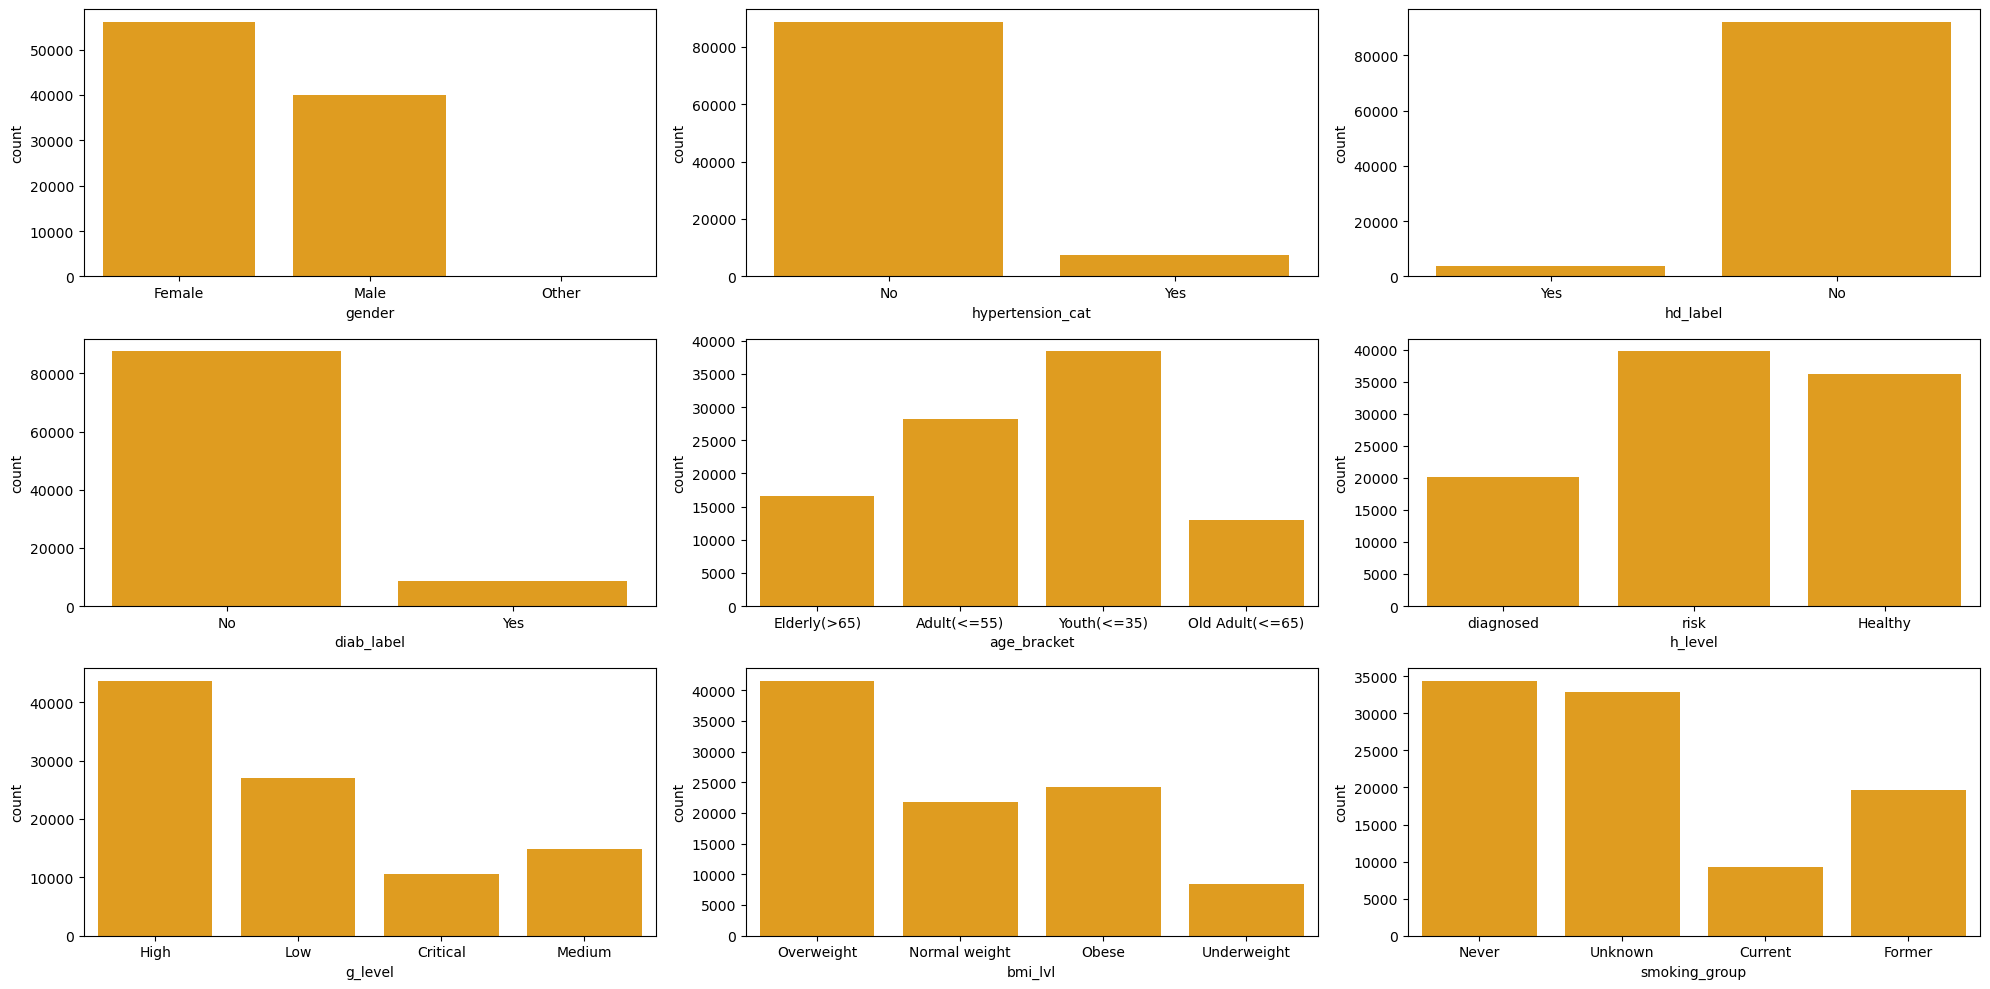

In [89]:
###Categorical colums
categorical_data = df.select_dtypes(include="object")
cat_column = categorical_data.columns

fig, position = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
position = position.flatten()

for index, column_name in enumerate(cat_column):
    sns.countplot(x=df[column_name], color="orange", ax=position[index])

plt.tight_layout()
plt.show()

- Smoking history shows, (never, unknown) have the highest count.
- more people are without hypertension, than the individuals with hypertension
- more people are at risk of blood sugar, which opens them to the risk of diabetes.
- There is a high risk of people with glucose level.
- bmi level shows more patients are overweight and are at risk to diabetes.

### Bivariate Analysis
#### Numerical vs Numerical

In [90]:
numerical_data.head(2)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,54,0,0,27.32,6.6,80,0


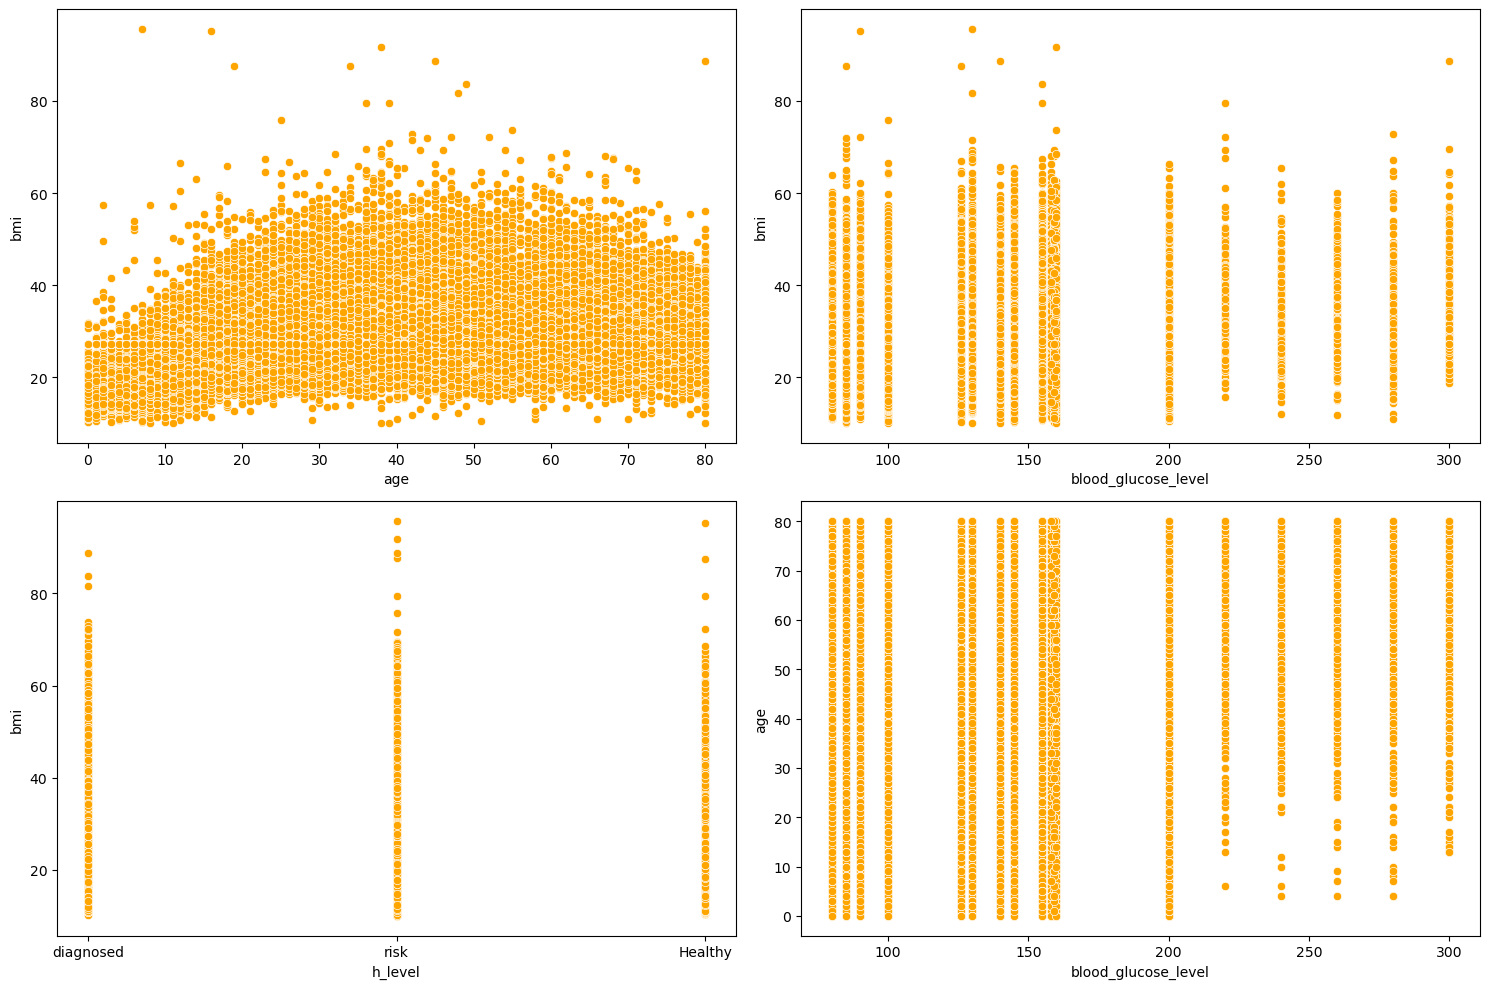

In [91]:
#Data Visualization with scatterplot
fig, position = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.scatterplot(x=df["age"], y=df["bmi"], color="orange", ax=position[0,0])
sns.scatterplot(x=df["blood_glucose_level"], y=df["bmi"], color="orange", ax=position[0,1])
sns.scatterplot(x=df["h_level"], y=df["bmi"], color="orange", ax=position[1,0])
sns.scatterplot(x=df["blood_glucose_level"], y=df["age"], color="orange", ax=position[1,1])

plt.tight_layout()
plt.show()

- the top left plot of the age and bmi shows a dense clustering that many patients have similar bmi values. No clear trend between the age and bmi and is evenly distributed across age, I think it is not a strong predictor for diabetes

#### Numerical vs Categorical

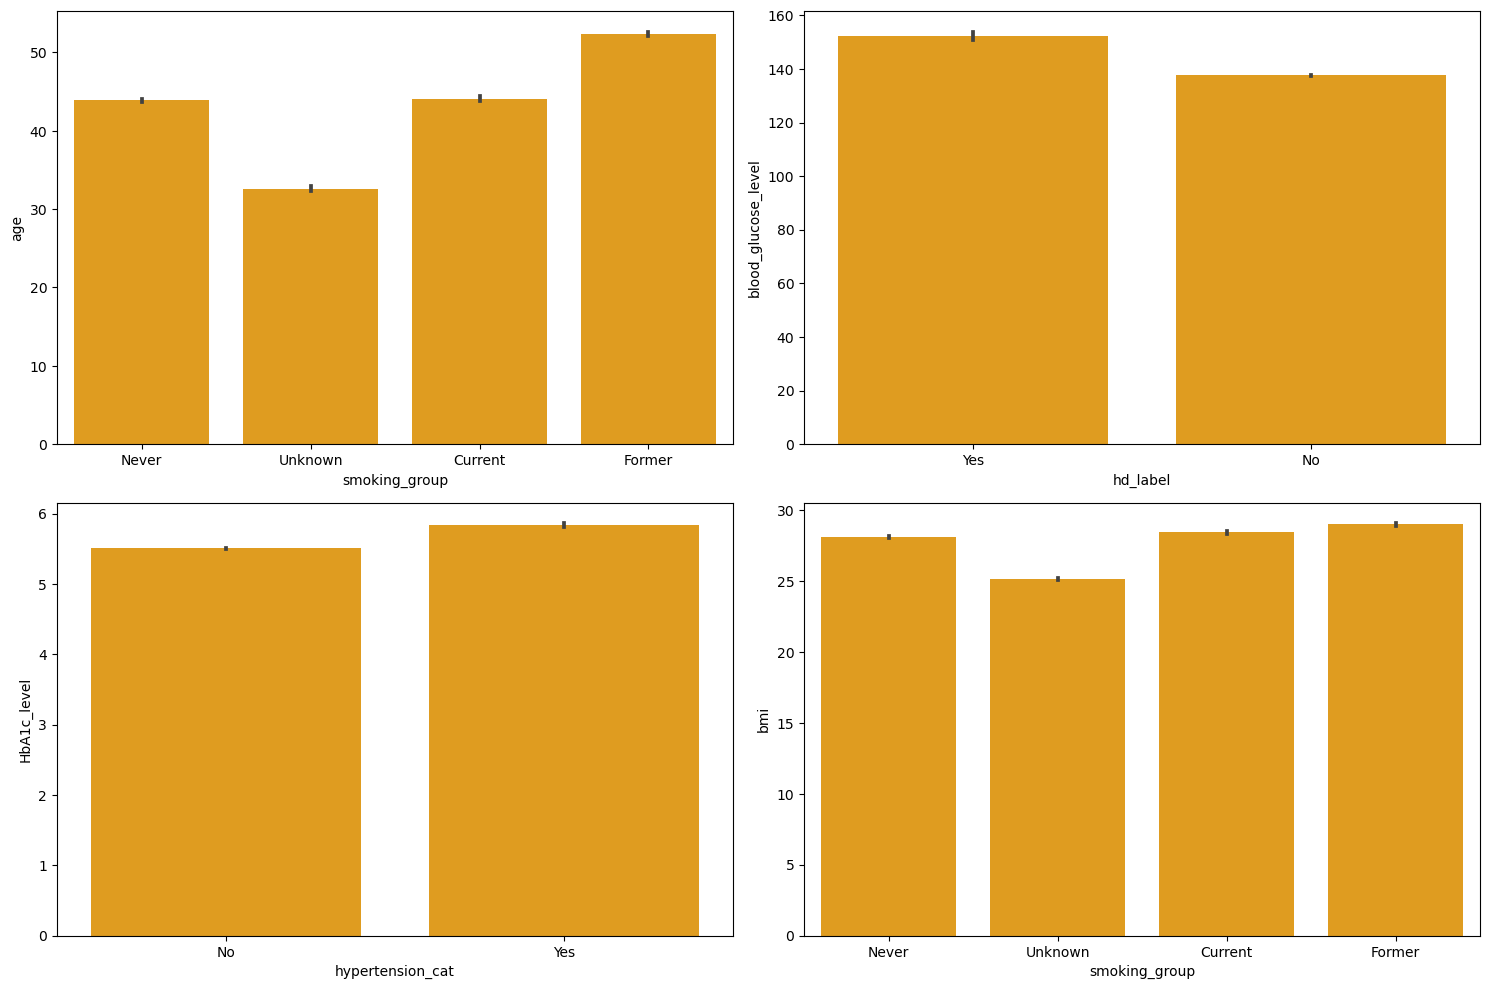

In [93]:
#data visualizationbarplot
fig, position = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.barplot(y=df["age"], x=df["smoking_group"], color="orange", ax=position[0,0])
sns.barplot(y=df["blood_glucose_level"], x=df["hd_label"], color="orange", ax=position[0,1])
sns.barplot(y=df["HbA1c_level"], x=df["hypertension_cat"], color="orange", ax=position[1,0])
sns.barplot(y=df["bmi"], x=df["smoking_group"], color="orange", ax=position[1,1])

plt.tight_layout()
plt.show()

- on the top left, ages more than 50 were former smokers. Those in their early 40s are never smokers. younger ones between their 20s and 30s shows that they have no smoking history.
- on the top right, blood glucose level up to or almost 140 (higher glucose level), has heart disease.
- on the below right, Hemoglobin A1C level around 5.4, has no hypertension, and those with above 5 and above have hypertension and also at risk to have hypertension.
- on the below left, the analysis shows those with smoking history-No info, have a healthy weight range. Former smokers are more of overweight or obese, because they have bmi that ranges between 25 and 30.

#### Categorical vs Categorical

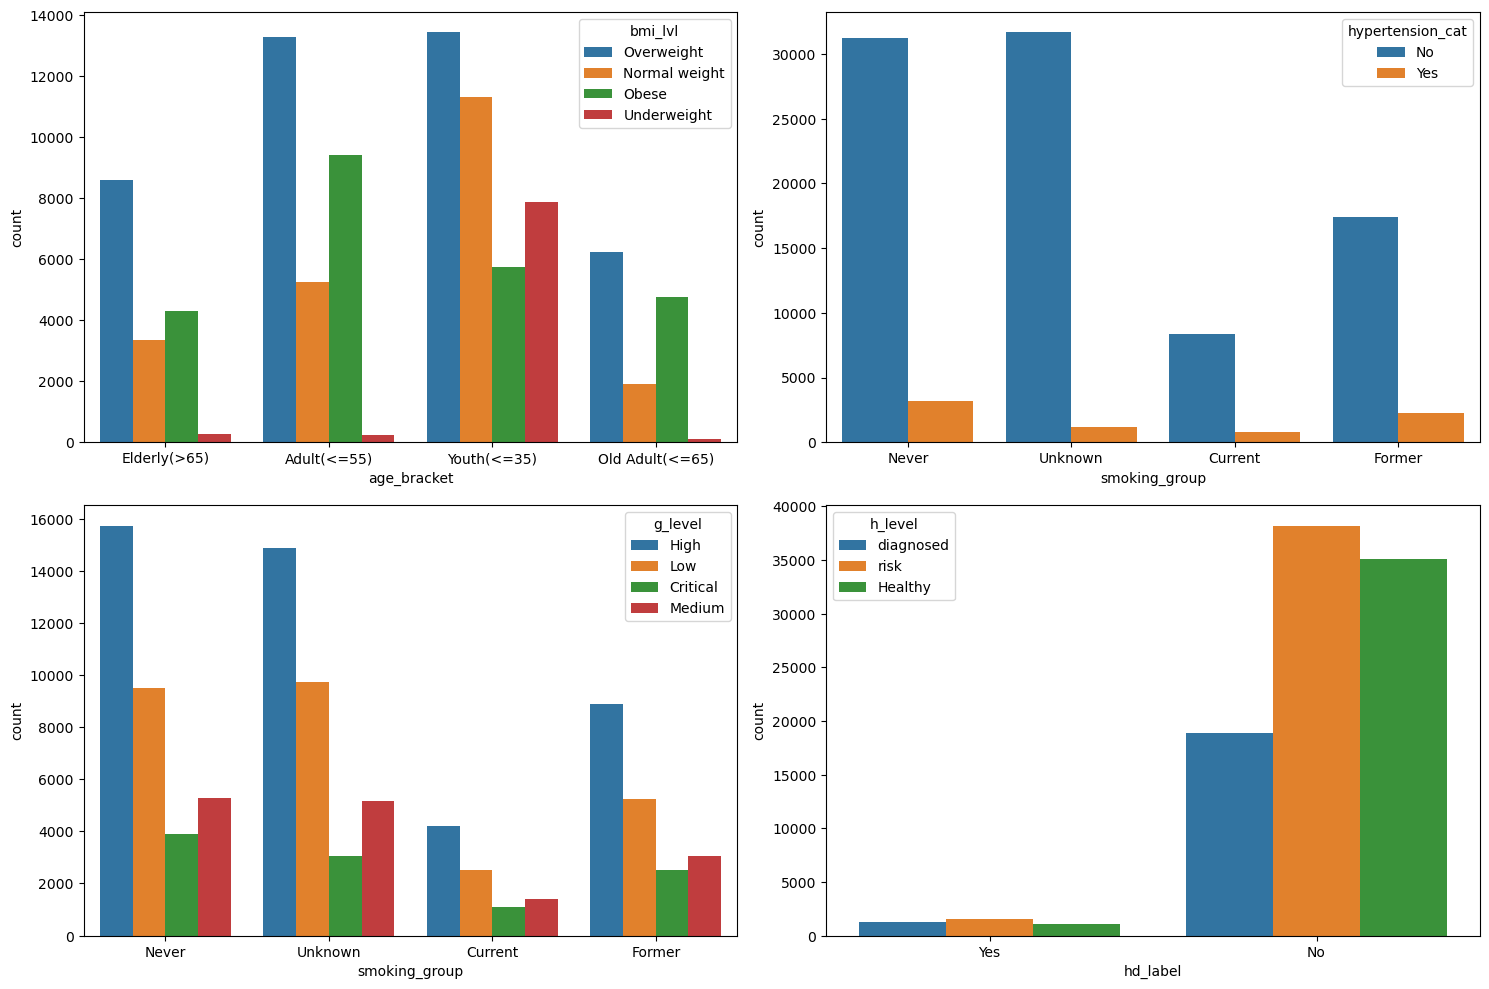

In [94]:
#countplotplot
fig, position = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(x="age_bracket", data=df, hue='bmi_lvl', ax=position[0,0])
sns.countplot(x="smoking_group", data=df, hue='hypertension_cat', ax=position[0,1])
sns.countplot(x="smoking_group", data=df, hue='g_level', ax=position[1,0])
sns.countplot(x="hd_label", data=df, hue='h_level', ax=position[1,1])

plt.tight_layout()
plt.show()

- on the top left - Overweight individuals dominate across all age brackets,Normal weight is the second most common category. Obesity and underweight are present but less frequent, with underweight being more common among younger individuals.
- top right: Most individuals have never smoked or have unknown smoking status. A smaller proportion of current and former smokers is observed. Hypertension is more common among former and never-smokers compared to current smokers.
- below left: High blood glucose is the most prevalent category across all smoking group. Medium and low levels are relatively balanced, while critical levels are the least common. Never smokers and those with unknown smoking history have the highest counts.
- Below right: Most individuals without heart disease fall into the risk and healthy HbA1c categories. Those diagnosed with diabetes (high HbA1c) are significantly more present in the heart disease group. Heart disease patients have fewer healthy individuals, suggesting a correlation between high HbA1c levels and heart disease.

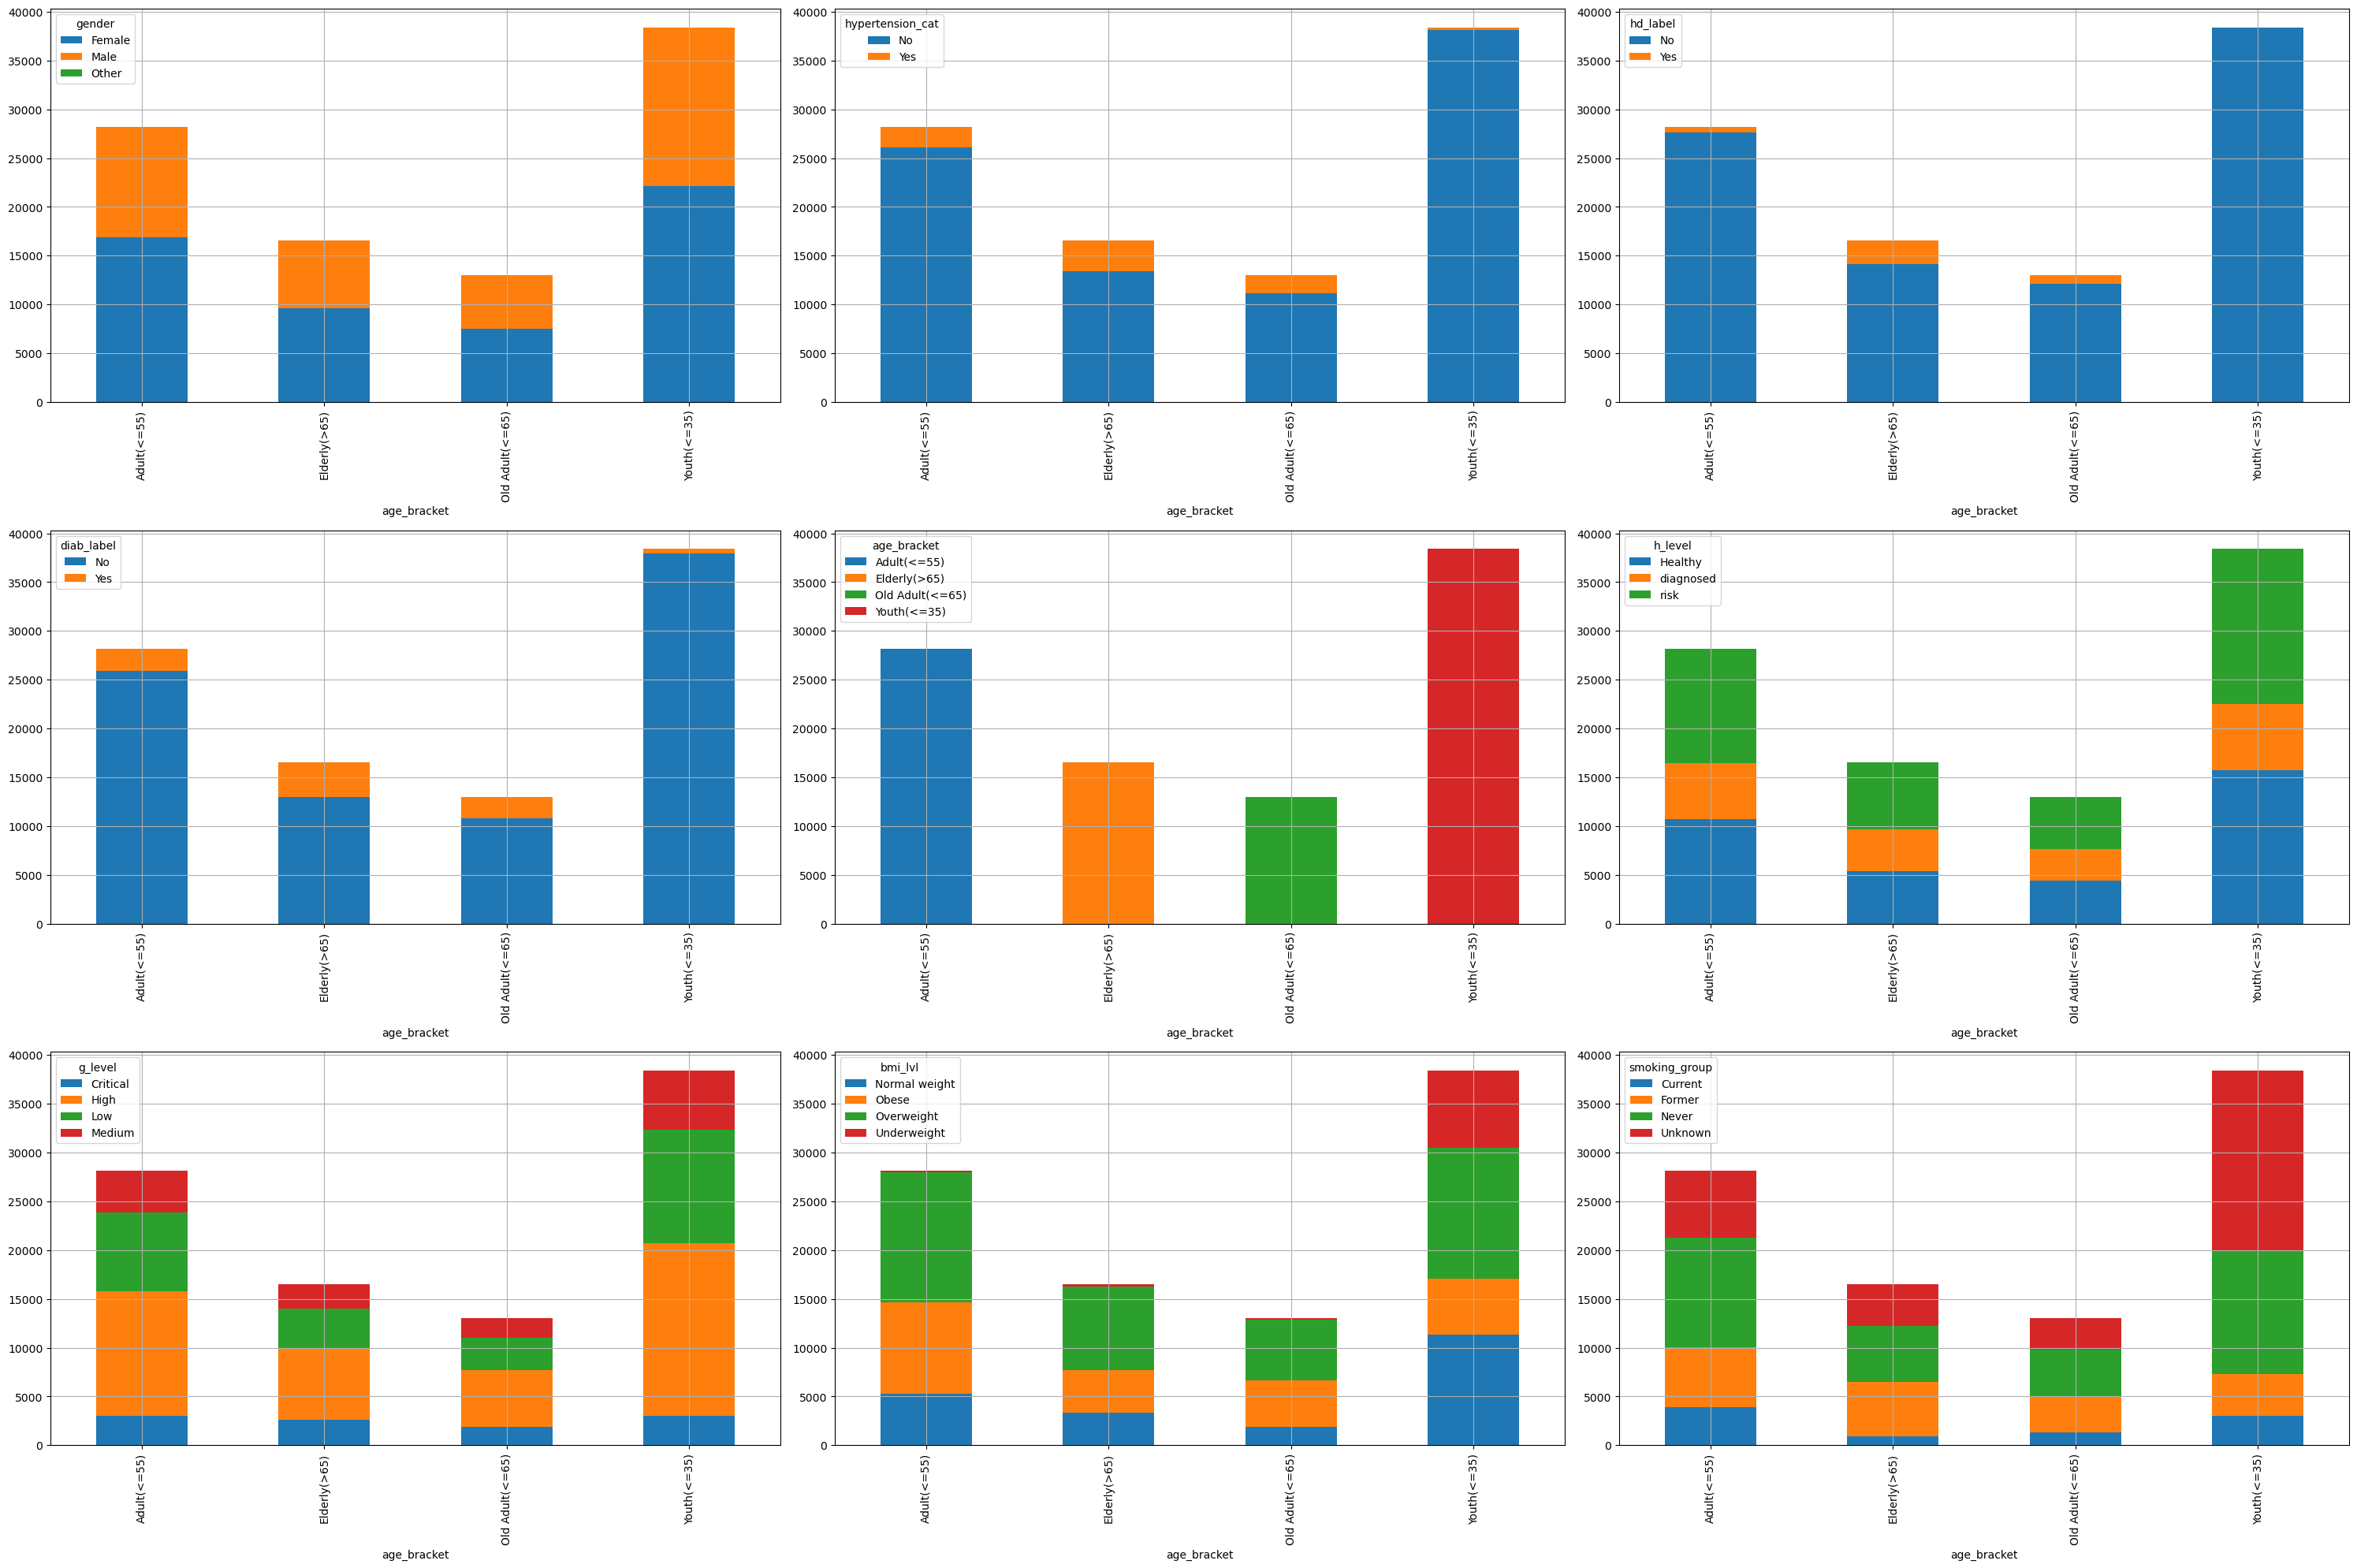

In [107]:
###Data Analysis with Stacked barplot
fig, position = plt.subplots(nrows=3, ncols=3, figsize=(30, 20))
position = position.flatten()

for index, column_name in enumerate(cat_column):
    pd.crosstab(df["age_bracket"], df[column_name]).plot(kind="bar", stacked=True, ax=position[index])
    position[index].grid(True)
    
plt.tight_layout()
plt.show()

- Top1:shows Gender distribution across age. Males and females are evenly distributed across all age groups.The youth category has the highest count.
- Top2: Hypertension vs. Age Bracket.Hypertension is more common among older individuals.Youth have the lowest hypertension rates.
- Top3: Majority do not have hypertension, but there is a trend of the higher the age, the higher the risk of hypertension.

- Middle1: Heart Disease vs. Age Bracket, The prevalence of heart disease increases with age. Most youth have no heart disease.
    the older group have high percent of heart disease that the adults and old adults. Heart disease is rare to find in young age group.
- Middle2: Diabetes vs. Age Bracket, Higher diabetes cases in older age groups.Youth have the least cases of diabetes.The proportion of diabetes increase with age, Youth group, have very low diabetes cases, while the elderly group have higher diabetes cases.
- Middle3: HbA1c Levels vs. Age Bracket, Youth form the largest portion of the dataset. Elderly individuals have the smallest representation.
- Below1: Blood Glucose Levels vs. Age Bracket, Youth have more critical and high glucose levels. Older adults show a mix of medium and low glucose levels.
- Below2: BMI Distribution by Age Bracket, Overweight and normal weight are the most common categories. Obesity is significant among older adults.
- Below3: Smoking History vs. Age Bracket, The "never smoked" category is dominant across all age groups. Former smokers are mostly older individuals.

### Multivariate Analysis

In [108]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'hypertension_cat', 'hd_label',
       'diab_label', 'age_bracket', 'h_level', 'g_level', 'bmi_lvl',
       'smoking_group'],
      dtype='object')

<AxesSubplot:xlabel='age_bracket', ylabel='blood_glucose_level'>

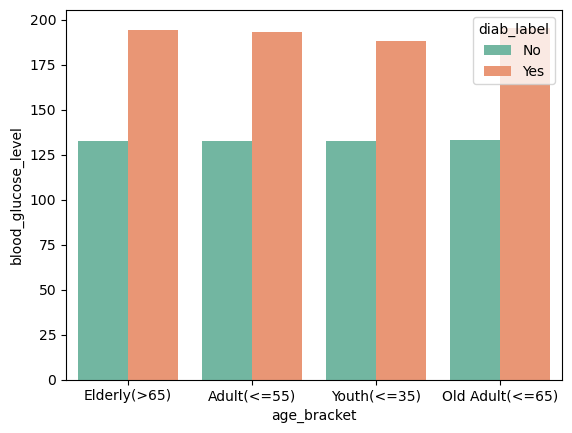

In [110]:
sns.barplot(x=df["age_bracket"], y=df["blood_glucose_level"], hue=df["diab_label"], palette="Set2", ci=None)

- The difference between diabetic and non-diabetic across all age bracket is consistent.
- non-diabetic persons have a stable blood glucose level across all ages
- Diabetic persons have higher blood glucose level, around >=163

<AxesSubplot:xlabel='age_bracket', ylabel='bmi'>

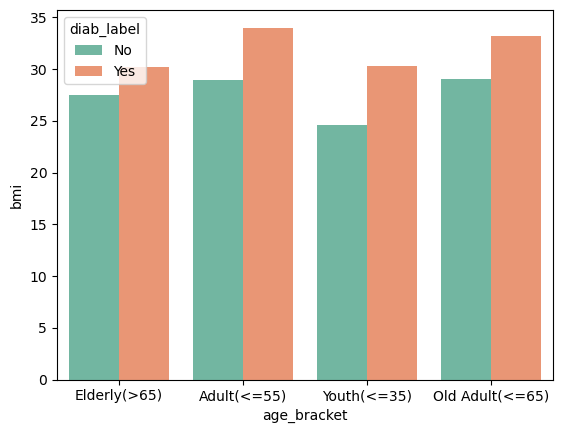

In [111]:
sns.barplot(x=df["age_bracket"], y=df["bmi"], hue=df["diab_label"], palette="Set2", ci=None)

- Diabetic persons have higher proportion across all age bracket. High BMI 0f >25 is an overweight and obesity, and is at risk of diabetes.
- Youth age bracket, have more of healthy weight persons with no diabetes. 
- Highest BMI, almost 30 is seen in the old adult(<=65), meaning they are obese and are at risk of diabetes.
- Adult, Old adult and elderly age brackets, have high BMI for those who are not diabetic, they could be overweighted, which could be caused by not involving the body in physical activities.

### Correlation Analysis

In [112]:
correlation_map = df.select_dtypes(include=['number']).corr()

In [113]:
correlation_map

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257189,0.238353,0.345242,0.106750,0.114232,0.264806
hypertension,0.257189,1.000000,0.119963,0.148101,0.081449,0.084828,0.195684
heart_disease,0.238353,0.119963,1.000000,0.061366,0.068147,0.070829,0.170692
bmi,0.345242,0.148101,0.061366,1.000000,0.084398,0.092565,0.214926
HbA1c_level,0.106750,0.081449,0.068147,0.084398,1.000000,0.171583,0.406463
blood_glucose_level,0.114232,0.084828,0.070829,0.092565,0.171583,1.000000,0.424381
diabetes,0.264806,0.195684,0.170692,0.214926,0.406463,0.424381,1.000000


<AxesSubplot:>

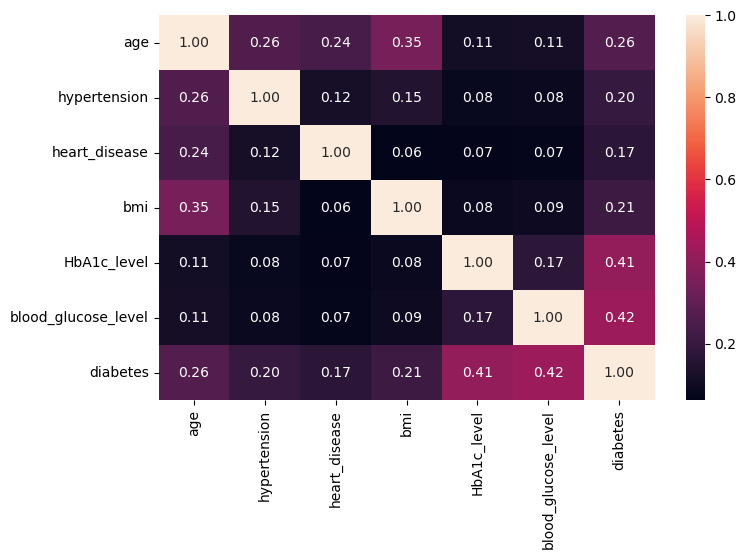

In [114]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_map, annot=True, fmt =".2f")

- Age and BMI - show a moderate positive correlation but not a strong relationship. From the visualizations above, older persons are likely to have high BMI.
- Age and hypertension(0.26), alos a positive correlation but not a stong relationship.
- Age and diabetes(0.22), positie correlation but no string relationship. The older they are, the higher the risk of diabetes.
- HbA1c level and Diabetes - moderate positve correlation. The average level of blood sugar can be connected to diabetes.
- glucose level is alos correlated to diabetes.

<AxesSubplot:xlabel='diabetes', ylabel='count'>

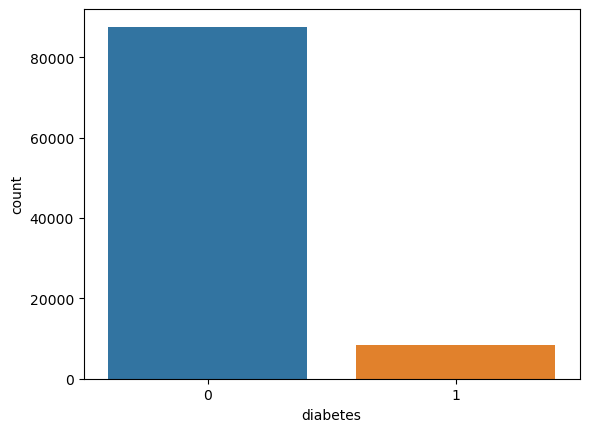

In [115]:
#Target Distribution
sns.countplot(x=df["diabetes"])

- the distribution shows, the dataset is imbalanced, that is, it is about 90:10 ratio.

In [118]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'hypertension_cat', 'hd_label',
       'diab_label', 'age_bracket', 'h_level', 'g_level', 'bmi_lvl',
       'smoking_group'],
      dtype='object')

In [116]:
#Seperate the target
y = df["diabetes"]

In [117]:
#df_copy2 = df.copy

In [119]:
#create a copy of the data (Exclude target/label alongside other columns that was created)
x = df[['gender', 'age', 'hypertension', 'heart_disease','smoking_group',
       'h_level', 'g_level', 'bmi_lvl']]

In [120]:
x.head(2)

,gender,age,hypertension,heart_disease,smoking_group,h_level,g_level,bmi_lvl
0,Female,80,0,1,Never,diagnosed,High,Overweight
1,Female,54,0,0,Unknown,diagnosed,Low,Overweight


In [121]:
#confirm the datatypes
x.dtypes

gender           object
age               int32
hypertension      int64
heart_disease     int64
smoking_group    object
h_level          object
g_level          object
bmi_lvl          object
dtype: object

## categorical Encoding
### Using label encoder

In [123]:
cat_data = x.select_dtypes(include="object")
cat_col = cat_data.columns

In [124]:
cat_col

Index(['gender', 'smoking_group', 'h_level', 'g_level', 'bmi_lvl'], dtype='object')

In [122]:
from sklearn.preprocessing import LabelEncoder

In [126]:
#initialize
encoder = LabelEncoder()

In [127]:
x["smoking_group"] = encoder.fit_transform(x["smoking_group"])
x["gender"] = encoder.fit_transform(x["gender"])
x["h_level"] = encoder.fit_transform(x["h_level"])
x["g_level"] = encoder.fit_transform(x["g_level"])
x["bmi_lvl"] = encoder.fit_transform(x["bmi_lvl"])

In [128]:
x.head()

,gender,age,hypertension,heart_disease,smoking_group,h_level,g_level,bmi_lvl
0,0,80,0,1,2,1,1,2
1,0,54,0,0,3,1,2,2
2,1,28,0,0,2,2,1,2
3,0,36,0,0,0,0,1,0
4,1,76,1,1,0,0,1,0


In [131]:
len(x.select_dtypes(include="number").columns)

8

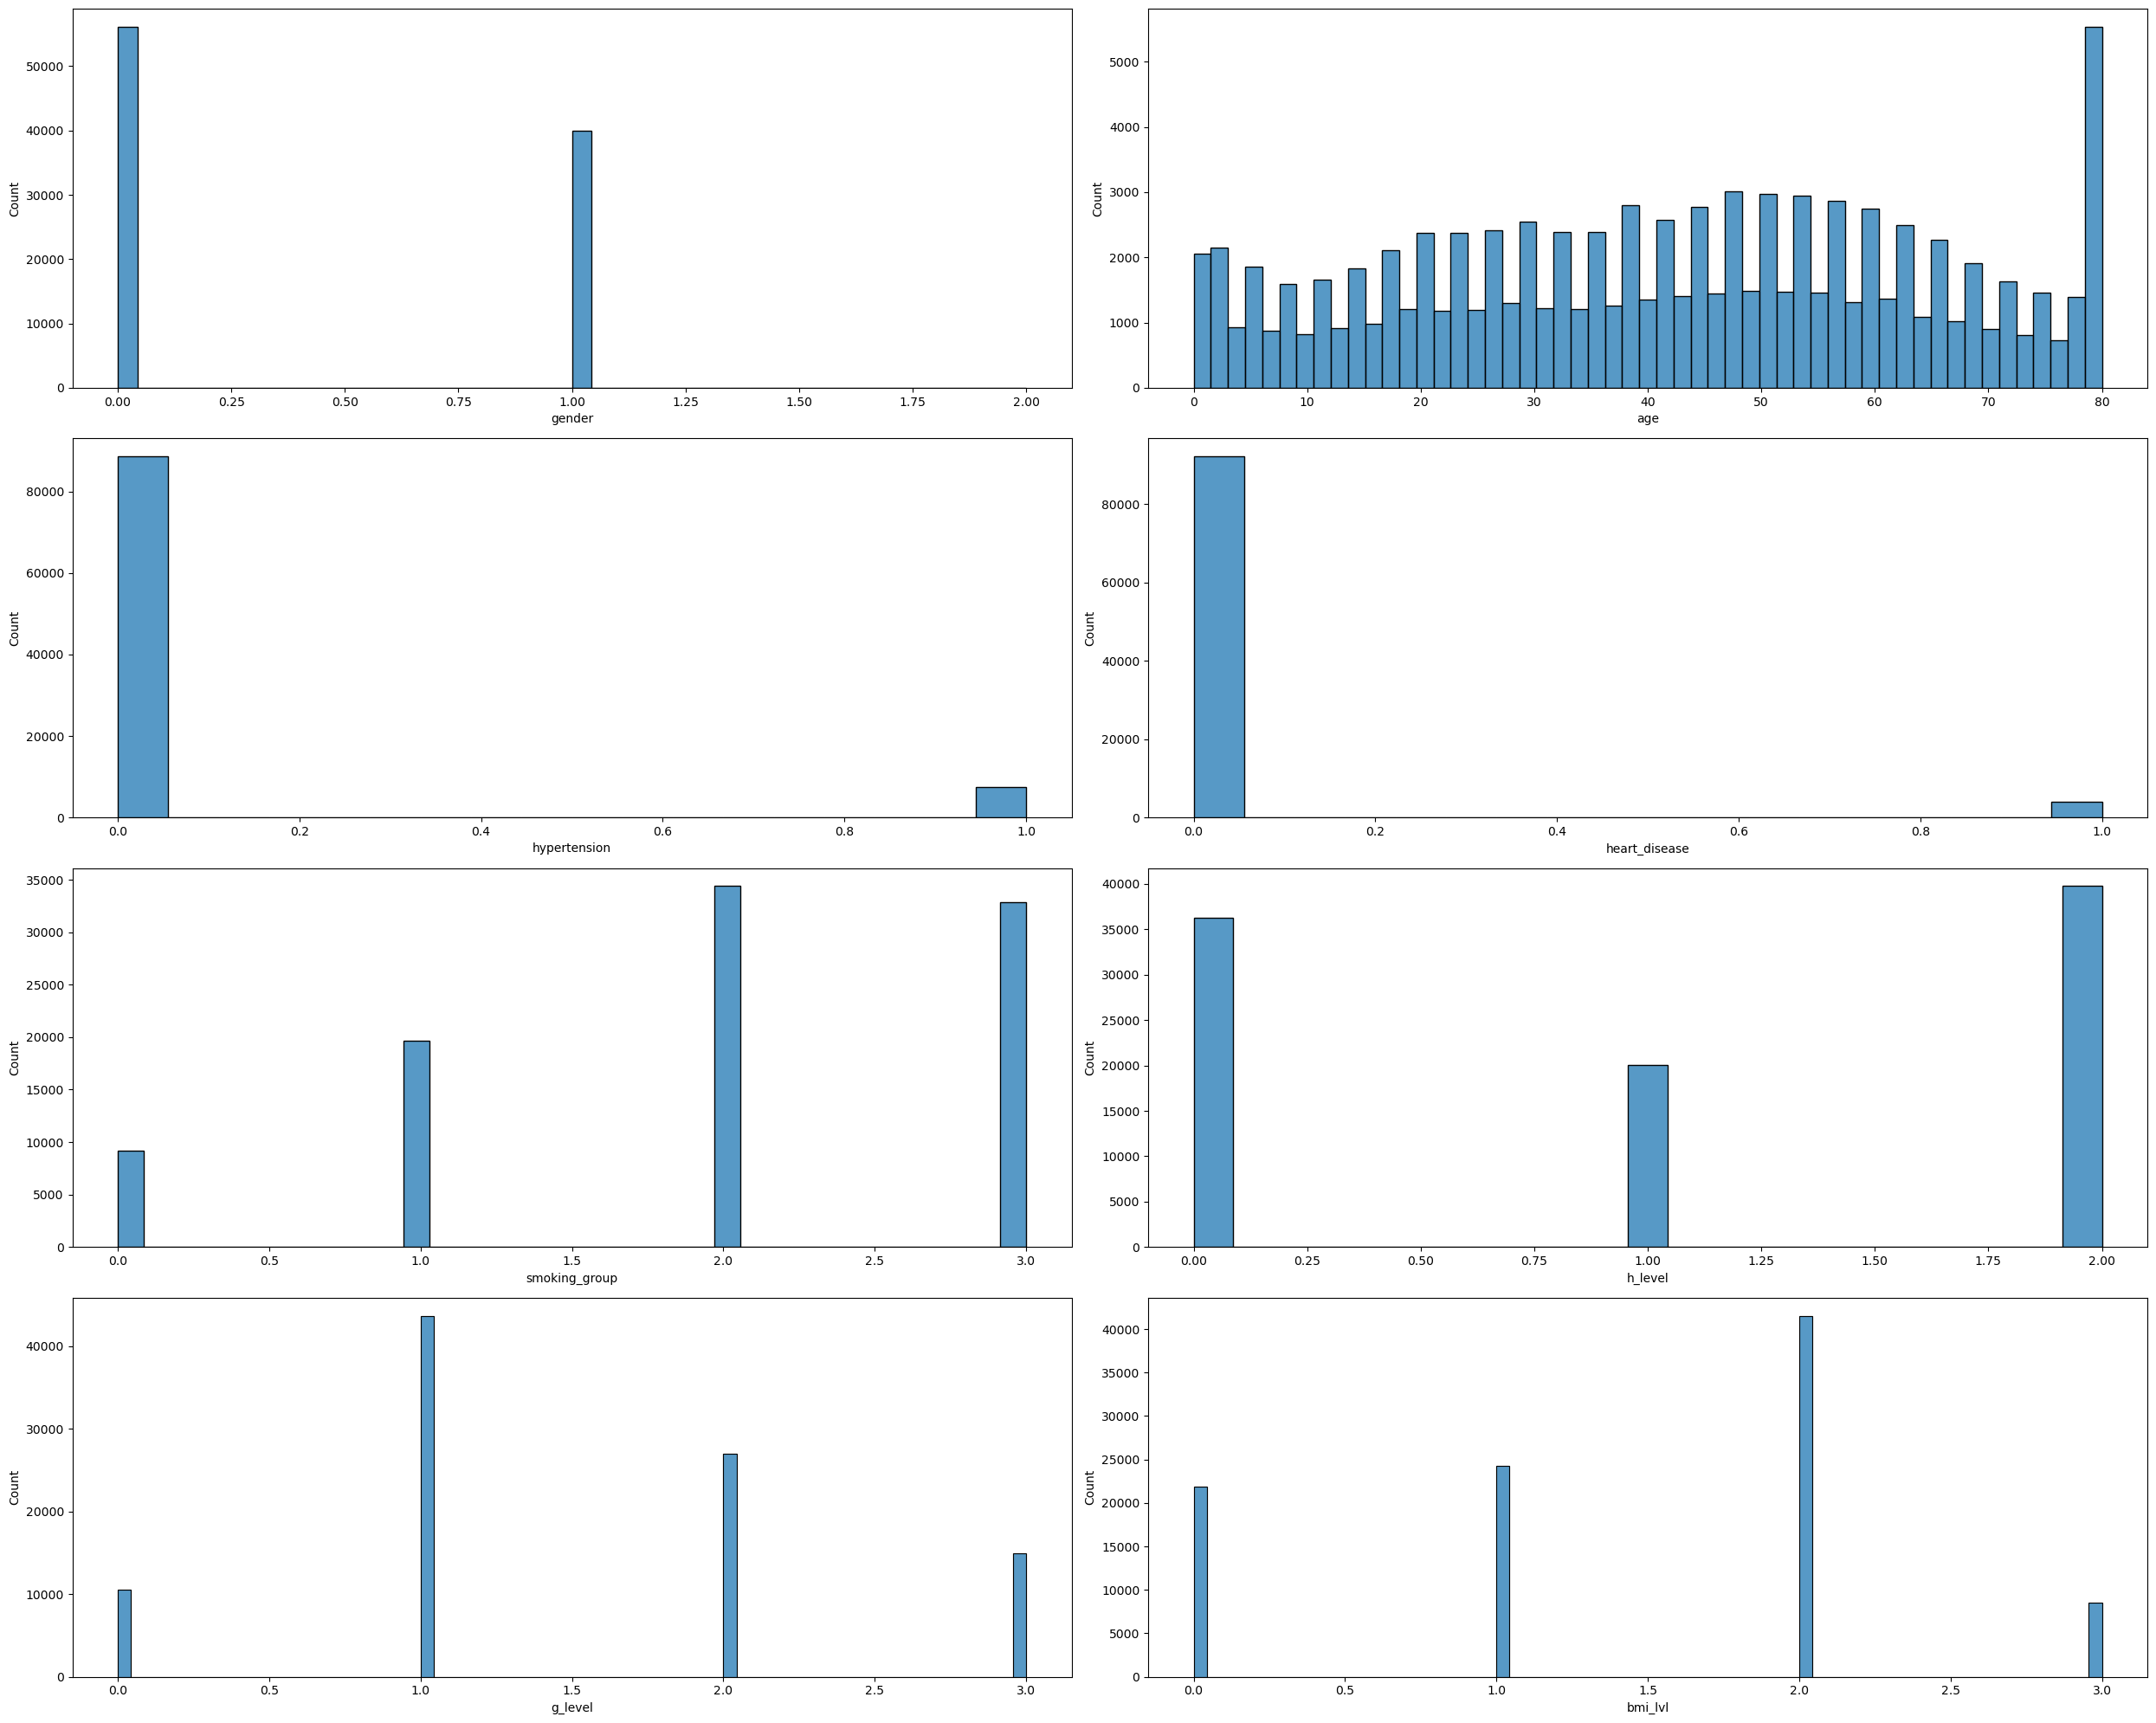

In [132]:
###Data Analysis to check the distribution of the features
fig, position = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
position = position.flatten()

for index, column_name in enumerate(x.select_dtypes(include="number")):
    sns.histplot(x[column_name], ax=position[index])
                                    
plt.tight_layout()
plt.show()

# Data Splitting and Model Training

In [133]:
#Split data into trainig and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [134]:
X_train.head(3)

,gender,age,hypertension,heart_disease,smoking_group,h_level,g_level,bmi_lvl
80177,1,42,0,0,3,0,2,2
24253,0,25,0,0,2,2,1,0
99996,0,2,0,0,3,1,2,3


In [135]:
y_train.value_counts()

0    70106
1     6783
Name: diabetes, dtype: int64

In [136]:
y_test.value_counts()

0    17524
1     1699
Name: diabetes, dtype: int64

In [101]:
#Initialize the scaler
#scaler = StandardScaler()

In [118]:
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)

Since it is already encoded, there is no need for scaling, i believe

### Logistic Regression

#### Before Tuning

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     17524
           1       0.61      0.18      0.28      1699

    accuracy                           0.92     19223
   macro avg       0.77      0.58      0.62     19223
weighted avg       0.90      0.92      0.90     19223

AUC-ROC: 0.58457477101277


<AxesSubplot:title={'center':'Confusion matrix_LR'}>

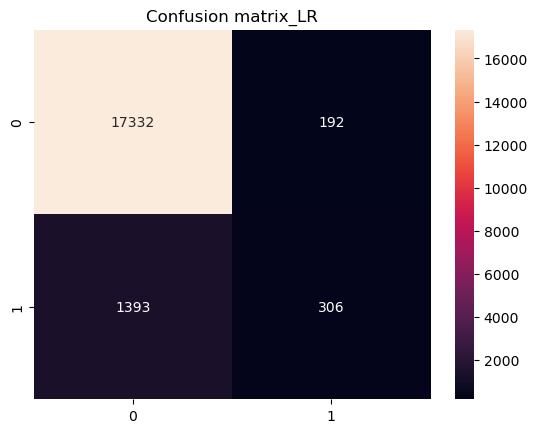

In [137]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
ly_prediction = logreg_model.predict(X_test)
lr_report = classification_report(y_test, ly_prediction, digits=2)
c_matrix_l = confusion_matrix(y_test, ly_prediction)
print(lr_report)
print("AUC-ROC:", roc_auc_score(y_test,ly_prediction))
plt.title("Confusion matrix_LR")
sns.heatmap(c_matrix_l, annot=True, fmt="g")

- Class 0 (No Diabetes) with 17524 cases and class 1 (have diabetes) with 1699 cases
- The model correctly classifies 92% of total cases.
- However, accuracy alone is misleading due to class imbalance (many more non-diabetes cases than diabetes cases).
- for class 0: Precision: 0.93 → When the model predicts no diabetes (0), it is correct 93% of the time. Recall: 0.99 meansThe model almost never misses a non-diabetes case. F1-score: 0.96 means there is a strong balance of precision and recall for class 0.
- For class 1: Precision: 0.61 means When the model predicts diabetes (1), it is correct 61% of the time. Recall: 0.18 means The model only identifies 18% of actual diabetes cases (very poor recall). F1-score: 0.28 means Overall, the model struggles with diabetes detection.

- **confusion matrix** explains, (True Negative),that is, The model correctly predicted no diabetes(class 0) 17332 cases.
- (False positive), that is, the model incorrectly predicted diabetes for non diabetic persons, 192 cases.
- (False Negative), the model missed 1,393 actual diabetes cases, predicting them as no diabetes.
- (True Positive), Model correctly predicted 306 cases to be diabetes for actual diabetic persons.


===============Naive Bayes===============
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     17524
           1       0.30      0.34      0.32      1699

    accuracy                           0.87     19223
   macro avg       0.62      0.63      0.62     19223
weighted avg       0.88      0.87      0.87     19223



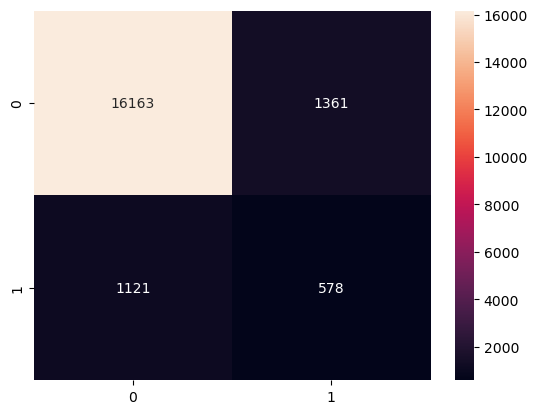

===============Took: 0 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     17524
           1       0.58      0.42      0.49      1699

    accuracy                           0.92     19223
   macro avg       0.76      0.69      0.72     19223
weighted avg       0.91      0.92      0.92     19223



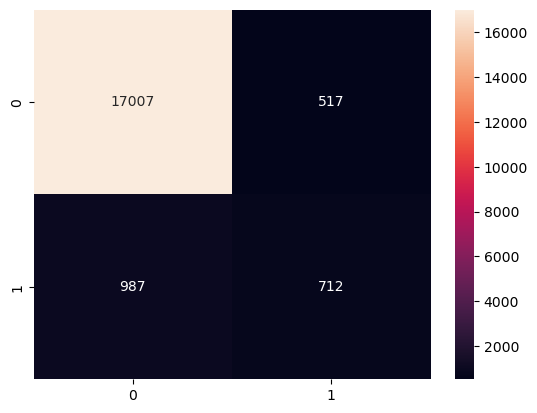

===============Took: 0 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     17524
           1       0.59      0.48      0.53      1699

    accuracy                           0.92     19223
   macro avg       0.77      0.72      0.74     19223
weighted avg       0.92      0.92      0.92     19223



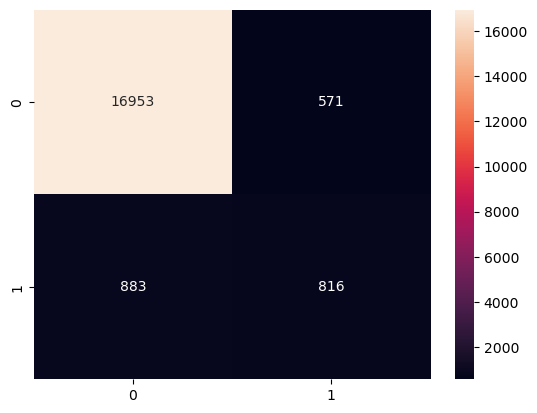

===============Took: 3 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     17524
           1       0.69      0.50      0.58      1699

    accuracy                           0.94     19223
   macro avg       0.82      0.74      0.77     19223
weighted avg       0.93      0.94      0.93     19223



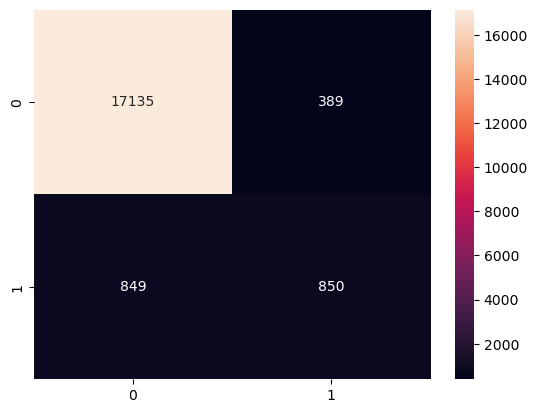

===============Took: 0 seconds to train===============


In [205]:
classifiers_bcw = [[GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
    [RandomForestClassifier(random_state=42), 'Random Forest'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers_bcw:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)

## Data Balancing
- Using Class Weight

              precision    recall  f1-score   support

           0       0.95      0.90      0.93     17524
           1       0.36      0.56      0.44      1699

    accuracy                           0.87     19223
   macro avg       0.66      0.73      0.68     19223
weighted avg       0.90      0.87      0.89     19223

AUC-ROC: 0.7295248598105228


Text(0.5, 23.52222222222222, 'Actual Value')

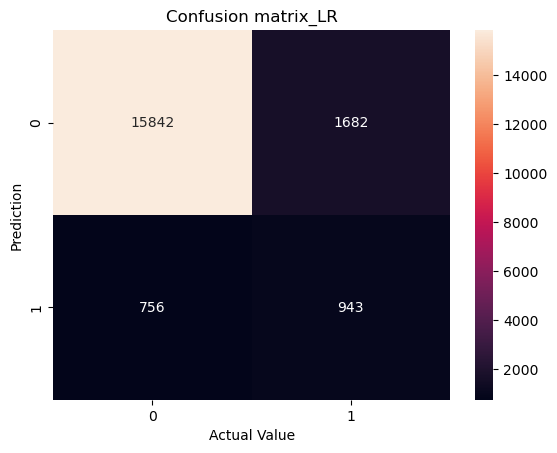

In [138]:
logreg_model = LogisticRegression(random_state=42, class_weight={0:1, 1:4})
logreg_model.fit(X_train, y_train)
ly_prediction = logreg_model.predict(X_test)
lr_report = classification_report(y_test, ly_prediction, digits=2)
c_matrix_l = confusion_matrix(y_test, ly_prediction)
print(lr_report)
print("AUC-ROC:", roc_auc_score(y_test,ly_prediction))
plt.title("Confusion matrix_LR")
sns.heatmap(c_matrix_l, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

- Overall Accuracy Dropped Slightly (from 92% to 87%), meaning the model is now more sensitive to minority cases, balancing the classes.
- There is an improved Recall for Class 1 (Diabetes) of 56% (Previously 18%). The model now captures more diabetes cases, reducing false negatives (missed cases). This is crucial in medical diagnostics to avoid missing actual diabetes patients.
- A Lower Precision for Class 1 of 36% (Previously 61%). More false positives, meaning some non-diabetic cases are misclassified as diabetic.
- The model has moderate discrimination ability between diabetic and non-diabetic cases- AUC = 73%

#### Using other classification models

===============Naive Bayes===============
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     17524
           1       0.30      0.34      0.32      1699

    accuracy                           0.87     19223
   macro avg       0.62      0.63      0.62     19223
weighted avg       0.88      0.87      0.87     19223



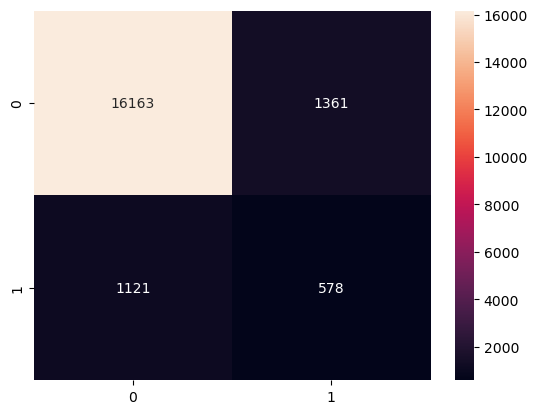

===============Took: 0 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     17524
           1       0.45      0.64      0.53      1699

    accuracy                           0.90     19223
   macro avg       0.71      0.78      0.73     19223
weighted avg       0.92      0.90      0.91     19223



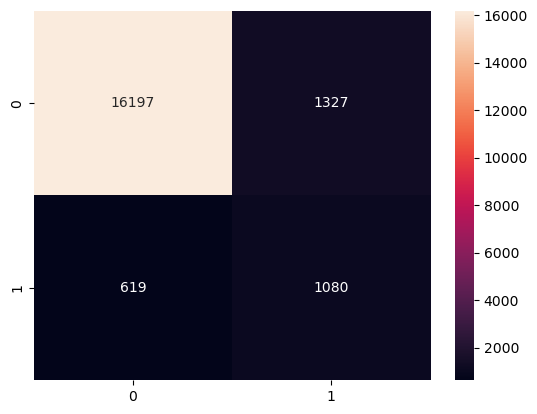

===============Took: 0 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     17524
           1       0.49      0.60      0.54      1699

    accuracy                           0.91     19223
   macro avg       0.73      0.77      0.74     19223
weighted avg       0.92      0.91      0.91     19223



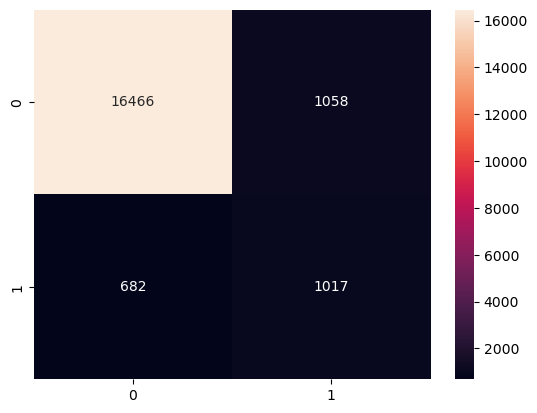

===============Took: 3 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     17524
           1       0.69      0.50      0.58      1699

    accuracy                           0.94     19223
   macro avg       0.82      0.74      0.77     19223
weighted avg       0.93      0.94      0.93     19223



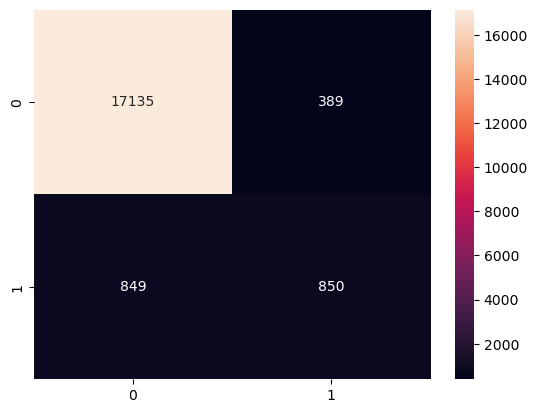

===============Took: 0 seconds to train===============


In [152]:
class_weights = {0: 1, 1: 4}

classifiers = [[GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)

- The four models didnt have a good recall score, and so having difficulty in predicting correctly.

In [139]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


### Applying SMOTE

In [140]:
from imblearn.over_sampling import SMOTE

In [184]:
x

,gender,age,hypertension,heart_disease,smoking_group,h_level,g_level,bmi_lvl
0,0,80,0,1,2,1,1,2
1,0,54,0,0,3,1,2,2
2,1,28,0,0,2,2,1,2
3,0,36,0,0,0,0,1,0
4,1,76,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
99994,0,36,0,0,3,0,1,0
99996,0,2,0,0,3,1,2,3
99997,1,66,0,0,1,2,1,2
99998,0,24,0,0,2,0,2,1


#### Data Scaling

In [185]:
# Initialize the scaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [186]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [187]:
y_resampled.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: diabetes, dtype: float64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

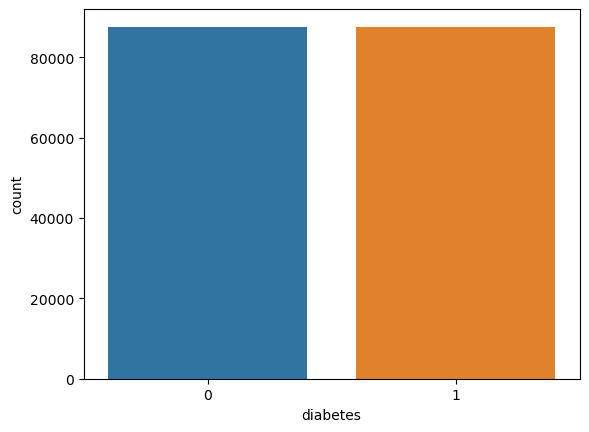

In [188]:
sns.countplot(x=y_resampled)

In [189]:
# Split the resampled data
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [190]:
from datetime import datetime

===============Logistic Regression===============
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77     17598
           1       0.77      0.79      0.78     17454

    accuracy                           0.78     35052
   macro avg       0.78      0.78      0.78     35052
weighted avg       0.78      0.78      0.78     35052



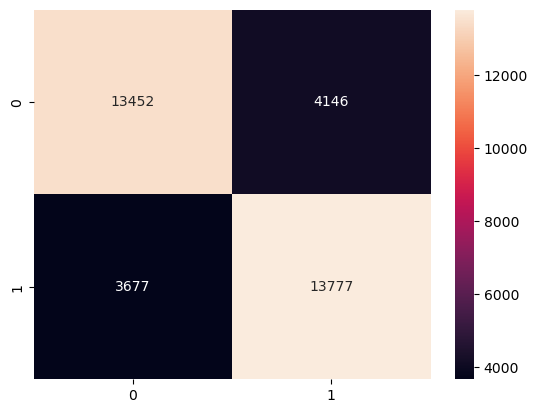

===============Took: 0 seconds to train===============
===============Naive Bayes===============
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80     17598
           1       0.84      0.68      0.76     17454

    accuracy                           0.78     35052
   macro avg       0.79      0.78      0.78     35052
weighted avg       0.79      0.78      0.78     35052



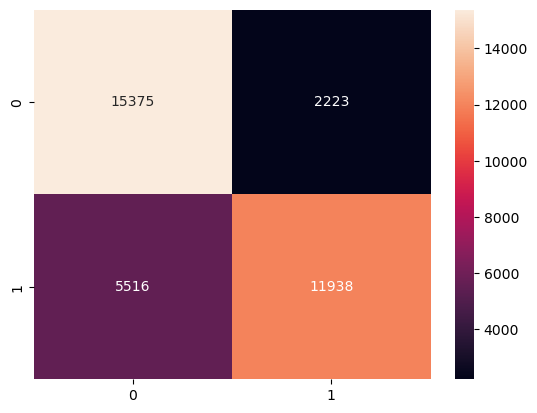

===============Took: 0 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     17598
           1       0.94      0.92      0.93     17454

    accuracy                           0.93     35052
   macro avg       0.93      0.93      0.93     35052
weighted avg       0.93      0.93      0.93     35052



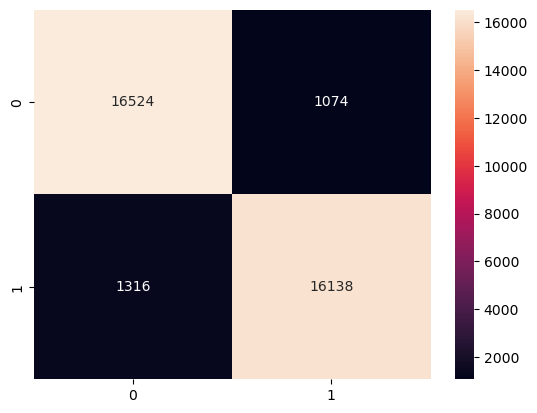

===============Took: 0 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     17598
           1       0.92      0.92      0.92     17454

    accuracy                           0.92     35052
   macro avg       0.92      0.92      0.92     35052
weighted avg       0.92      0.92      0.92     35052



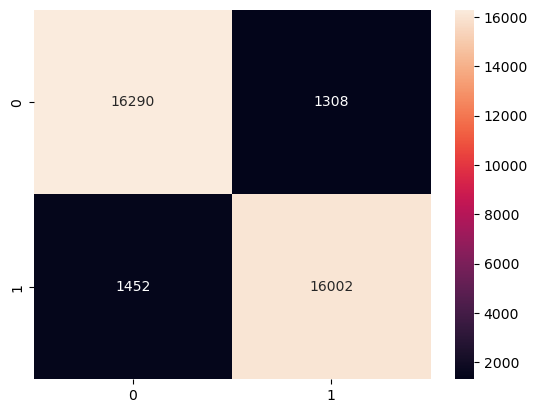

===============Took: 10 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91     17598
           1       0.90      0.93      0.91     17454

    accuracy                           0.91     35052
   macro avg       0.91      0.91      0.91     35052
weighted avg       0.91      0.91      0.91     35052



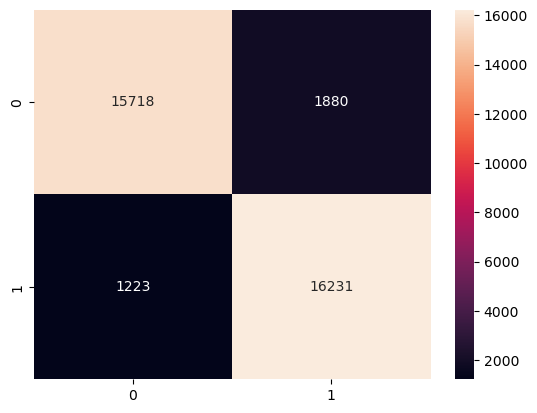

===============Took: 0 seconds to train===============


In [191]:
class_weights = "balanced"

classifiers_smt = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    [GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers_smt:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(X_train_re, y_train_re)
    predictions = model.predict(X_test_re)
    report = classification_report(y_test_re, predictions)
    matrix = confusion_matrix(y_test_re, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)

- **Logistic Regression**
- Accuracy: 78%.  a balanced model but slightly favors class 1. Precision and recall are nearly equal for both classes, meaning it's fairly stable but not the best model.
- **Naive Bayes**
- Accuracy: 78%. Higher recall for class 0 (87%) but lower recall for class 1 (68%). It is biased towards class 0, meaning it predicts "No Diabetes" more often than "Diabetes."
- **Decision Tree**
- Accuracy: 93%. Excellent precision, recall, and F1-score (all around 93%). Likely overfitting, meaning it performs too well on training data and may struggle on unseen data.
- **Random Forest**
- Accuracy: 92%. Very similar to Decision Tree but slightly less recall. Better generalization than Decision Tree due to multiple decision trees voting, making it more robust.
- **XGBoost**
- Accuracy: 91%. Slightly lower recall for class 0 but excellent for class 1. Best balance between precision and recall, meaning it handles false positives and false negatives well.

- Decison Tree performed best. I would recommend XGB or Random Forest for the best balance between accuracy and generalization.

## Feature Importance and Selection

In [192]:
classifiers_smt

[[LogisticRegression(class_weight='balanced', random_state=42),
  'Logistic Regression'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassifier(class_weight='balanced', random_state=42),
  'Decision Tree'],
 [RandomForestClassifier(class_weight='balanced', random_state=42),
  'Random Forest'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='mlogloss',
                feature_types=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators

In [193]:
classifiers_smt[2][0]

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [194]:
classifiers_smt[2][0].feature_importances_

array([0.0161241 , 0.40268208, 0.01065436, 0.00606819, 0.03737392,
       0.33207374, 0.16594439, 0.02907923])

In [159]:
x.head(2)

,gender,age,hypertension,heart_disease,smoking_group,h_level,g_level,bmi_lvl
0,0,80,0,1,2,1,1,2
1,0,54,0,0,3,1,2,2


In [195]:
# Feature importance for Decsion Tree
importances = classifiers_smt[2][0].feature_importances_
importances

array([0.0161241 , 0.40268208, 0.01065436, 0.00606819, 0.03737392,
       0.33207374, 0.16594439, 0.02907923])

In [196]:
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

,Feature,Importance
0,gender,0.016124
1,age,0.402682
2,hypertension,0.010654
3,heart_disease,0.006068
4,smoking_group,0.037374
5,h_level,0.332074
6,g_level,0.165944
7,bmi_lvl,0.029079


In [198]:
#Random Forest
classifiers_smt[2][0]

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [199]:
# Feature importance for Random Forest
importances = classifiers_smt[3][0].feature_importances_
importances

array([0.00706687, 0.39620812, 0.02824965, 0.01276235, 0.0401562 ,
       0.26225286, 0.20309743, 0.05020652])

In [200]:
feature_names_rf = x.columns
feature_importance_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': importances})
feature_importance_rf

,Feature,Importance
0,gender,0.007067
1,age,0.396208
2,hypertension,0.028250
3,heart_disease,0.012762
4,smoking_group,0.040156
5,h_level,0.262253
6,g_level,0.203097
7,bmi_lvl,0.050207


In [202]:
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
feature_importance_rf

,Feature,Importance
1,age,0.396208
5,h_level,0.262253
6,g_level,0.203097
7,bmi_lvl,0.050207
4,smoking_group,0.040156
2,hypertension,0.028250
3,heart_disease,0.012762
0,gender,0.007067


<AxesSubplot:xlabel='Importance', ylabel='Feature'>

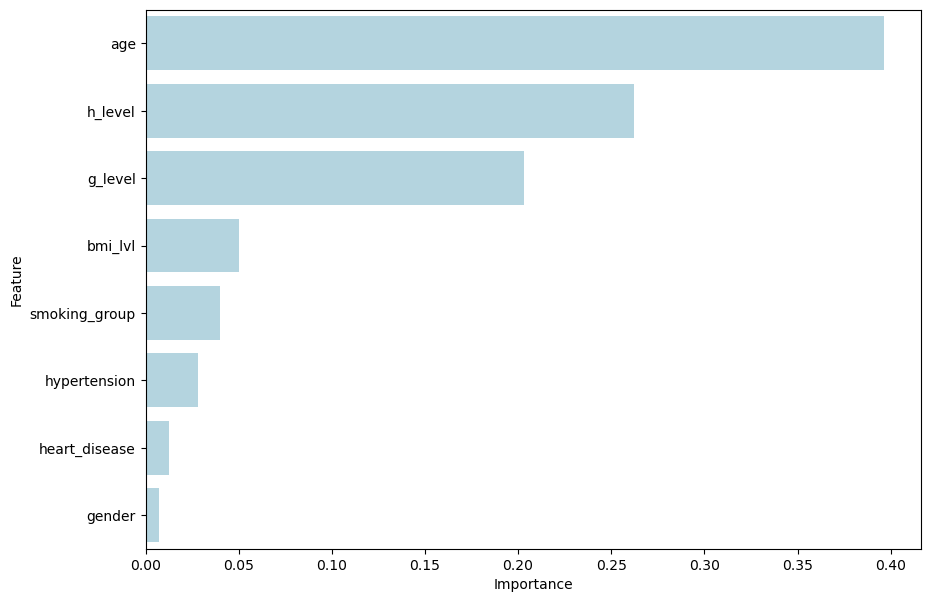

In [204]:
#Random forest
plt.figure(figsize=(10, 7))

sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, color='lightblue')

### Correlation Analysis

<AxesSubplot:>

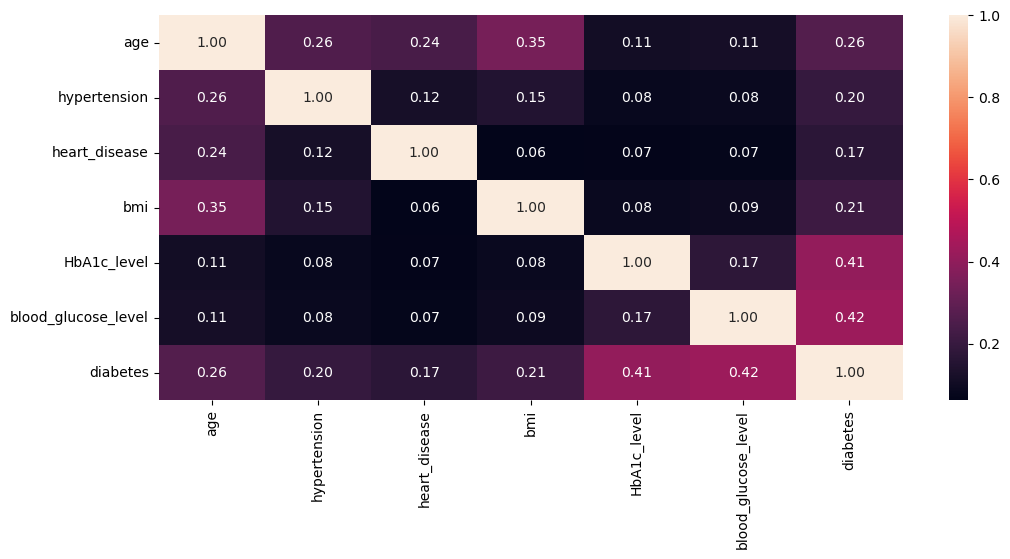

In [168]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f")

#### Selection

In [172]:
X_train_re.shape

(140208, 8)

In [174]:
#Test model with top 5 features
Xtrain_top_5 = X_train_re[:,:5]
Xtest_top_5 = X_test_re[:,:5]

In [175]:
Xtrain_top_5.shape

(140208, 5)

===============Logistic Regression===============
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73     17598
           1       0.72      0.76      0.74     17454

    accuracy                           0.73     35052
   macro avg       0.74      0.73      0.73     35052
weighted avg       0.74      0.73      0.73     35052



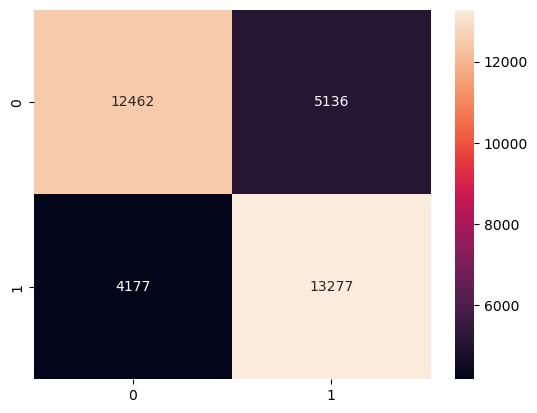

===============Took: 0 seconds to train===============
===============Naive Bayes===============
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.89      0.72     17598
           1       0.79      0.42      0.55     17454

    accuracy                           0.65     35052
   macro avg       0.70      0.65      0.63     35052
weighted avg       0.70      0.65      0.63     35052



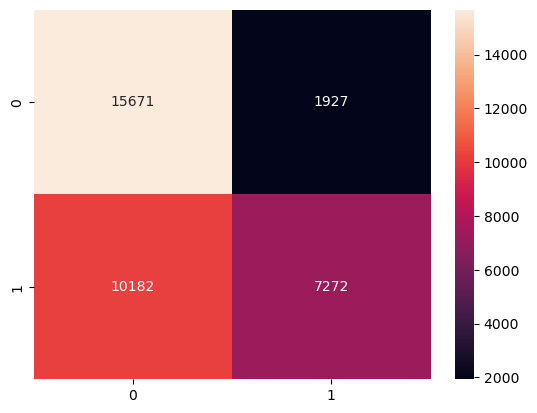

===============Took: 0 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87     17598
           1       0.89      0.83      0.86     17454

    accuracy                           0.86     35052
   macro avg       0.86      0.86      0.86     35052
weighted avg       0.86      0.86      0.86     35052



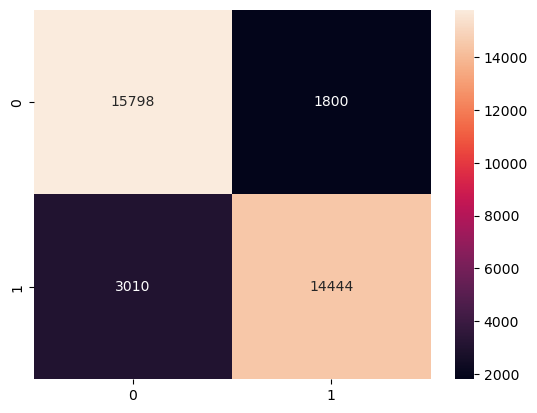

===============Took: 0 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86     17598
           1       0.88      0.82      0.85     17454

    accuracy                           0.86     35052
   macro avg       0.86      0.86      0.86     35052
weighted avg       0.86      0.86      0.86     35052



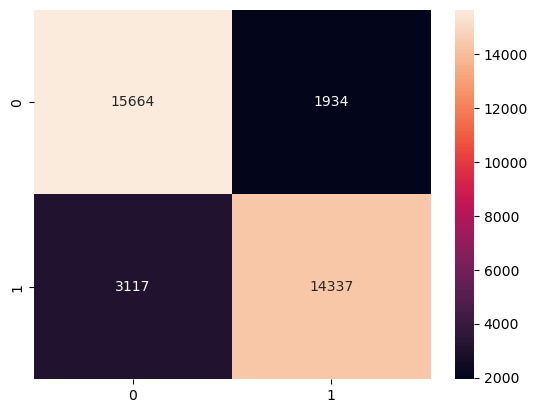

===============Took: 13 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79     17598
           1       0.79      0.78      0.79     17454

    accuracy                           0.79     35052
   macro avg       0.79      0.79      0.79     35052
weighted avg       0.79      0.79      0.79     35052



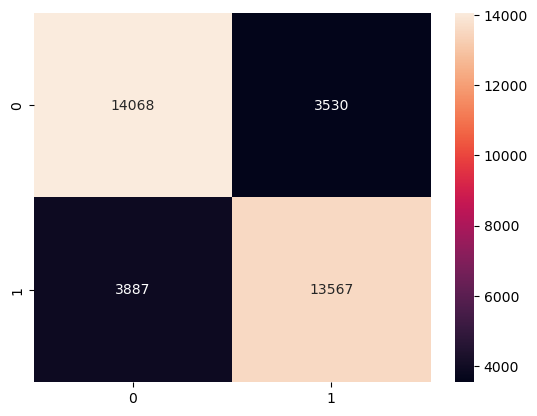

===============Took: 0 seconds to train===============


In [178]:
for classifier in classifiers:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(Xtrain_top_5, y_train_re)
    predictions = model.predict(Xtest_top_5)
    report = classification_report(y_test_re, predictions)
    matrix = confusion_matrix(y_test_re, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)